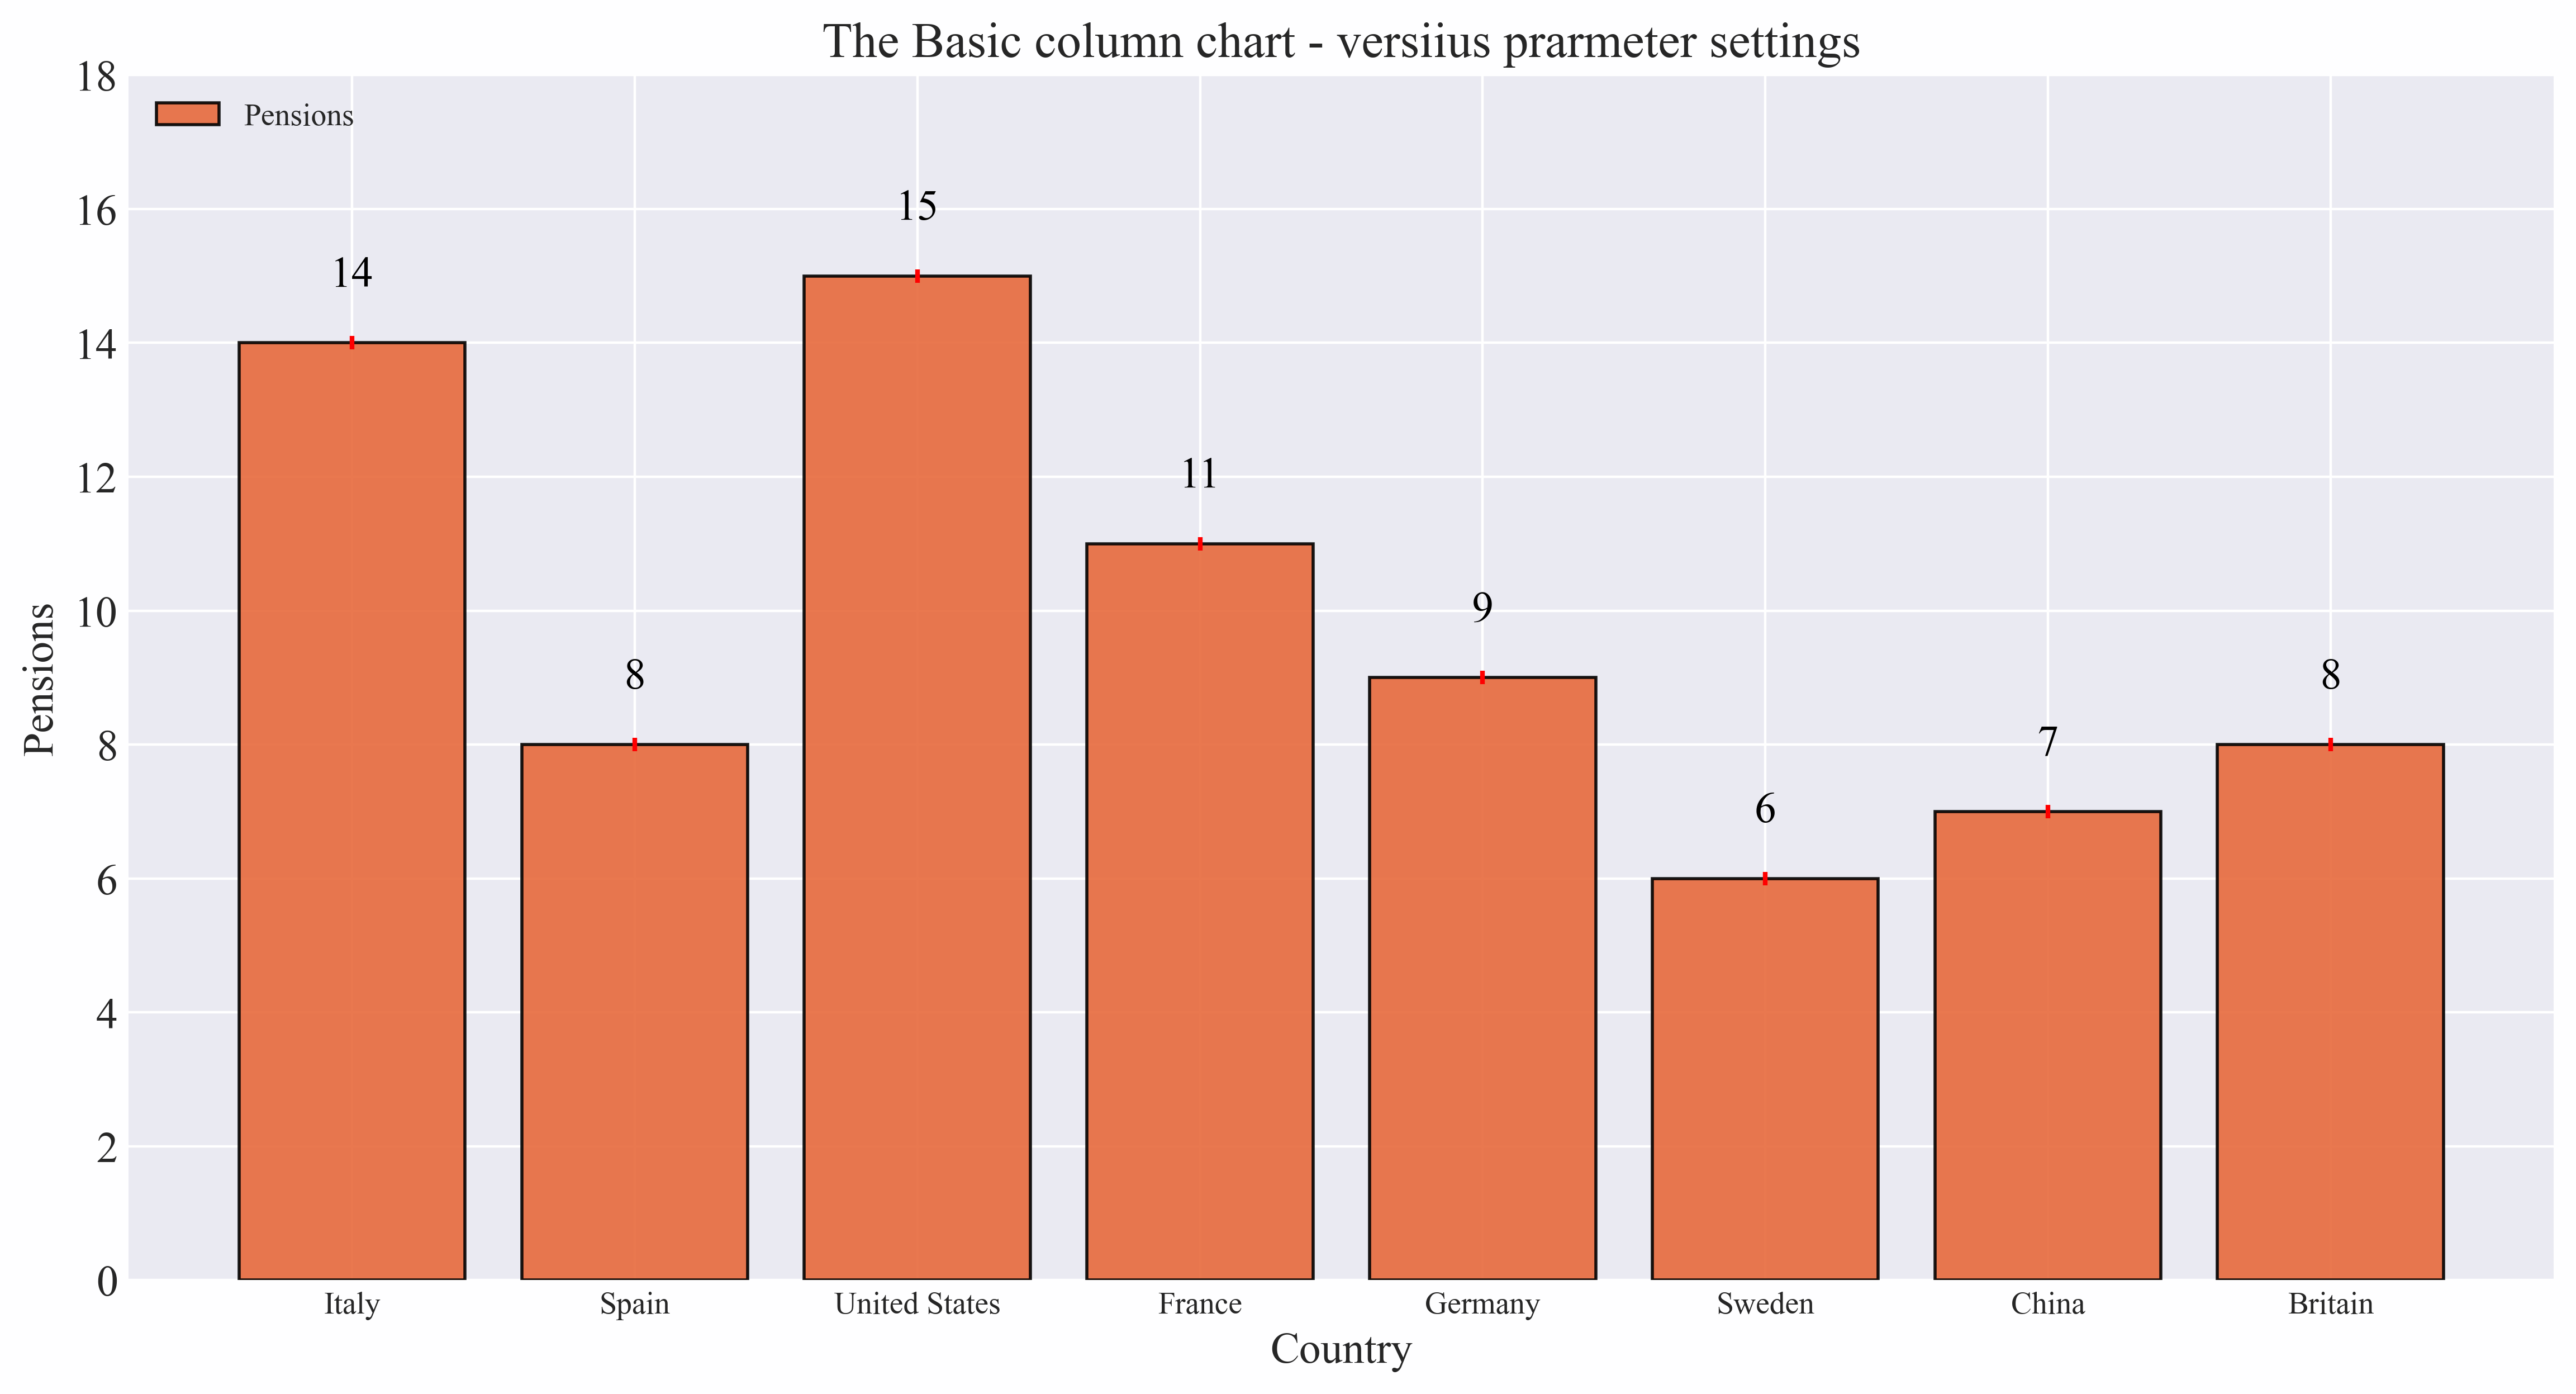

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotx
plt.rcParams['font.sans-serif'] = 'Times New Roman'  # 设置全局默认无衬线字体为罗马字体
from matplotlib.patches import FancyBboxPatch   # 从matplotlib的patches模块中导入FancyBboxPatch，用于创建复杂的边框样式

data = pd.read_csv('./data/stack_data_bar.csv')
x = data['Country']   # 从数据中提取'Country'列作为x轴数据
y = data['Pensions']  # 从数据中提取'Pensions'列（养老金数据）作为y轴数据

with plt.style.context(matplotx.styles.pitaya_smoothie['light']):  # 使用matplotx的pitaya_smoothie浅色主题作为绘图上下文
    plt.figure(figsize=(14,7),dpi=400) # 创建一个图形对象，设置画布大小为14x7英寸，分辨率为400dpi
    plt.bar(x,    # x轴数据（国家名称）
        height = y,     # 每个柱子的高度（养老金数值）
        width = .8,      # 柱子的宽度为0.8
        color = '#e7693c', # 柱子的填充颜色为橙红色（十六进制颜色编码）
        edgecolor = 'black', # 柱子边缘的颜色为黑色
        linewidth = 1,  # 柱子的边缘线条的宽度为1
        alpha = .9,   # 柱子透明度为0.9
        yerr = [.1, .1, .1, .1, .1, .1, .1, .1],  # 为每个柱子添加误差线，误差均值为0.1
        ecolor = 'red',   # 误差线颜色为红色
        label = 'Pensions',  # 设置该组数据的标签为'Pensions'(用于图例)
        bottom = [0,0,0,0,0,0,0,0],  # 每个柱子的起始位置 (底部坐标) 均为0
        align = 'center',  # 柱子在x轴上的对齐方式均为居中对齐 
    ) # 结束bar函数的调用
    plt.yticks(range(0,20,2),fontproperties='Times New Roman',fontsize = 14)  # 设置y轴刻度：范围从0到20，步长为2；字体为罗马字体，字号14
    plt.title('The Basic column chart - versiius prarmeter settings',fontsize = 16)  # 设置图表标题，内置指定
    plt.xlabel('Country',fontsize = 14)  # 设置x轴的标签和字号
    plt.ylabel('Pensions', fontsize = 14)  # 设置y轴的标签和字号
    for i in range(len(x)):   # 遍历循环：遍历x轴数据的每个索引（对应每个柱子）
        # 为每个柱子顶部台南佳数值标签：x坐标为当前国家，y坐标为当前养老金+1 (避免与柱子重叠)，显示为养老金数值，字体属性与颜色
        plt.text(x[i], y[i]+1, y[i], fontsize = 14, va = 'center', ha = 'center', fontproperties='Times New Roman', color='black')
    plt.legend(loc=2)  # 显示图例，位置设置为左上角 (loc=2对应左上角)
    plt.savefig('./output_image/bar_01.pdf', dpi=300, bbox_inches='tight', pad_inches=0.0)  # 保存图像到指定路径，分辨率为300，紧凑型布局，边距0.0
    plt.show()

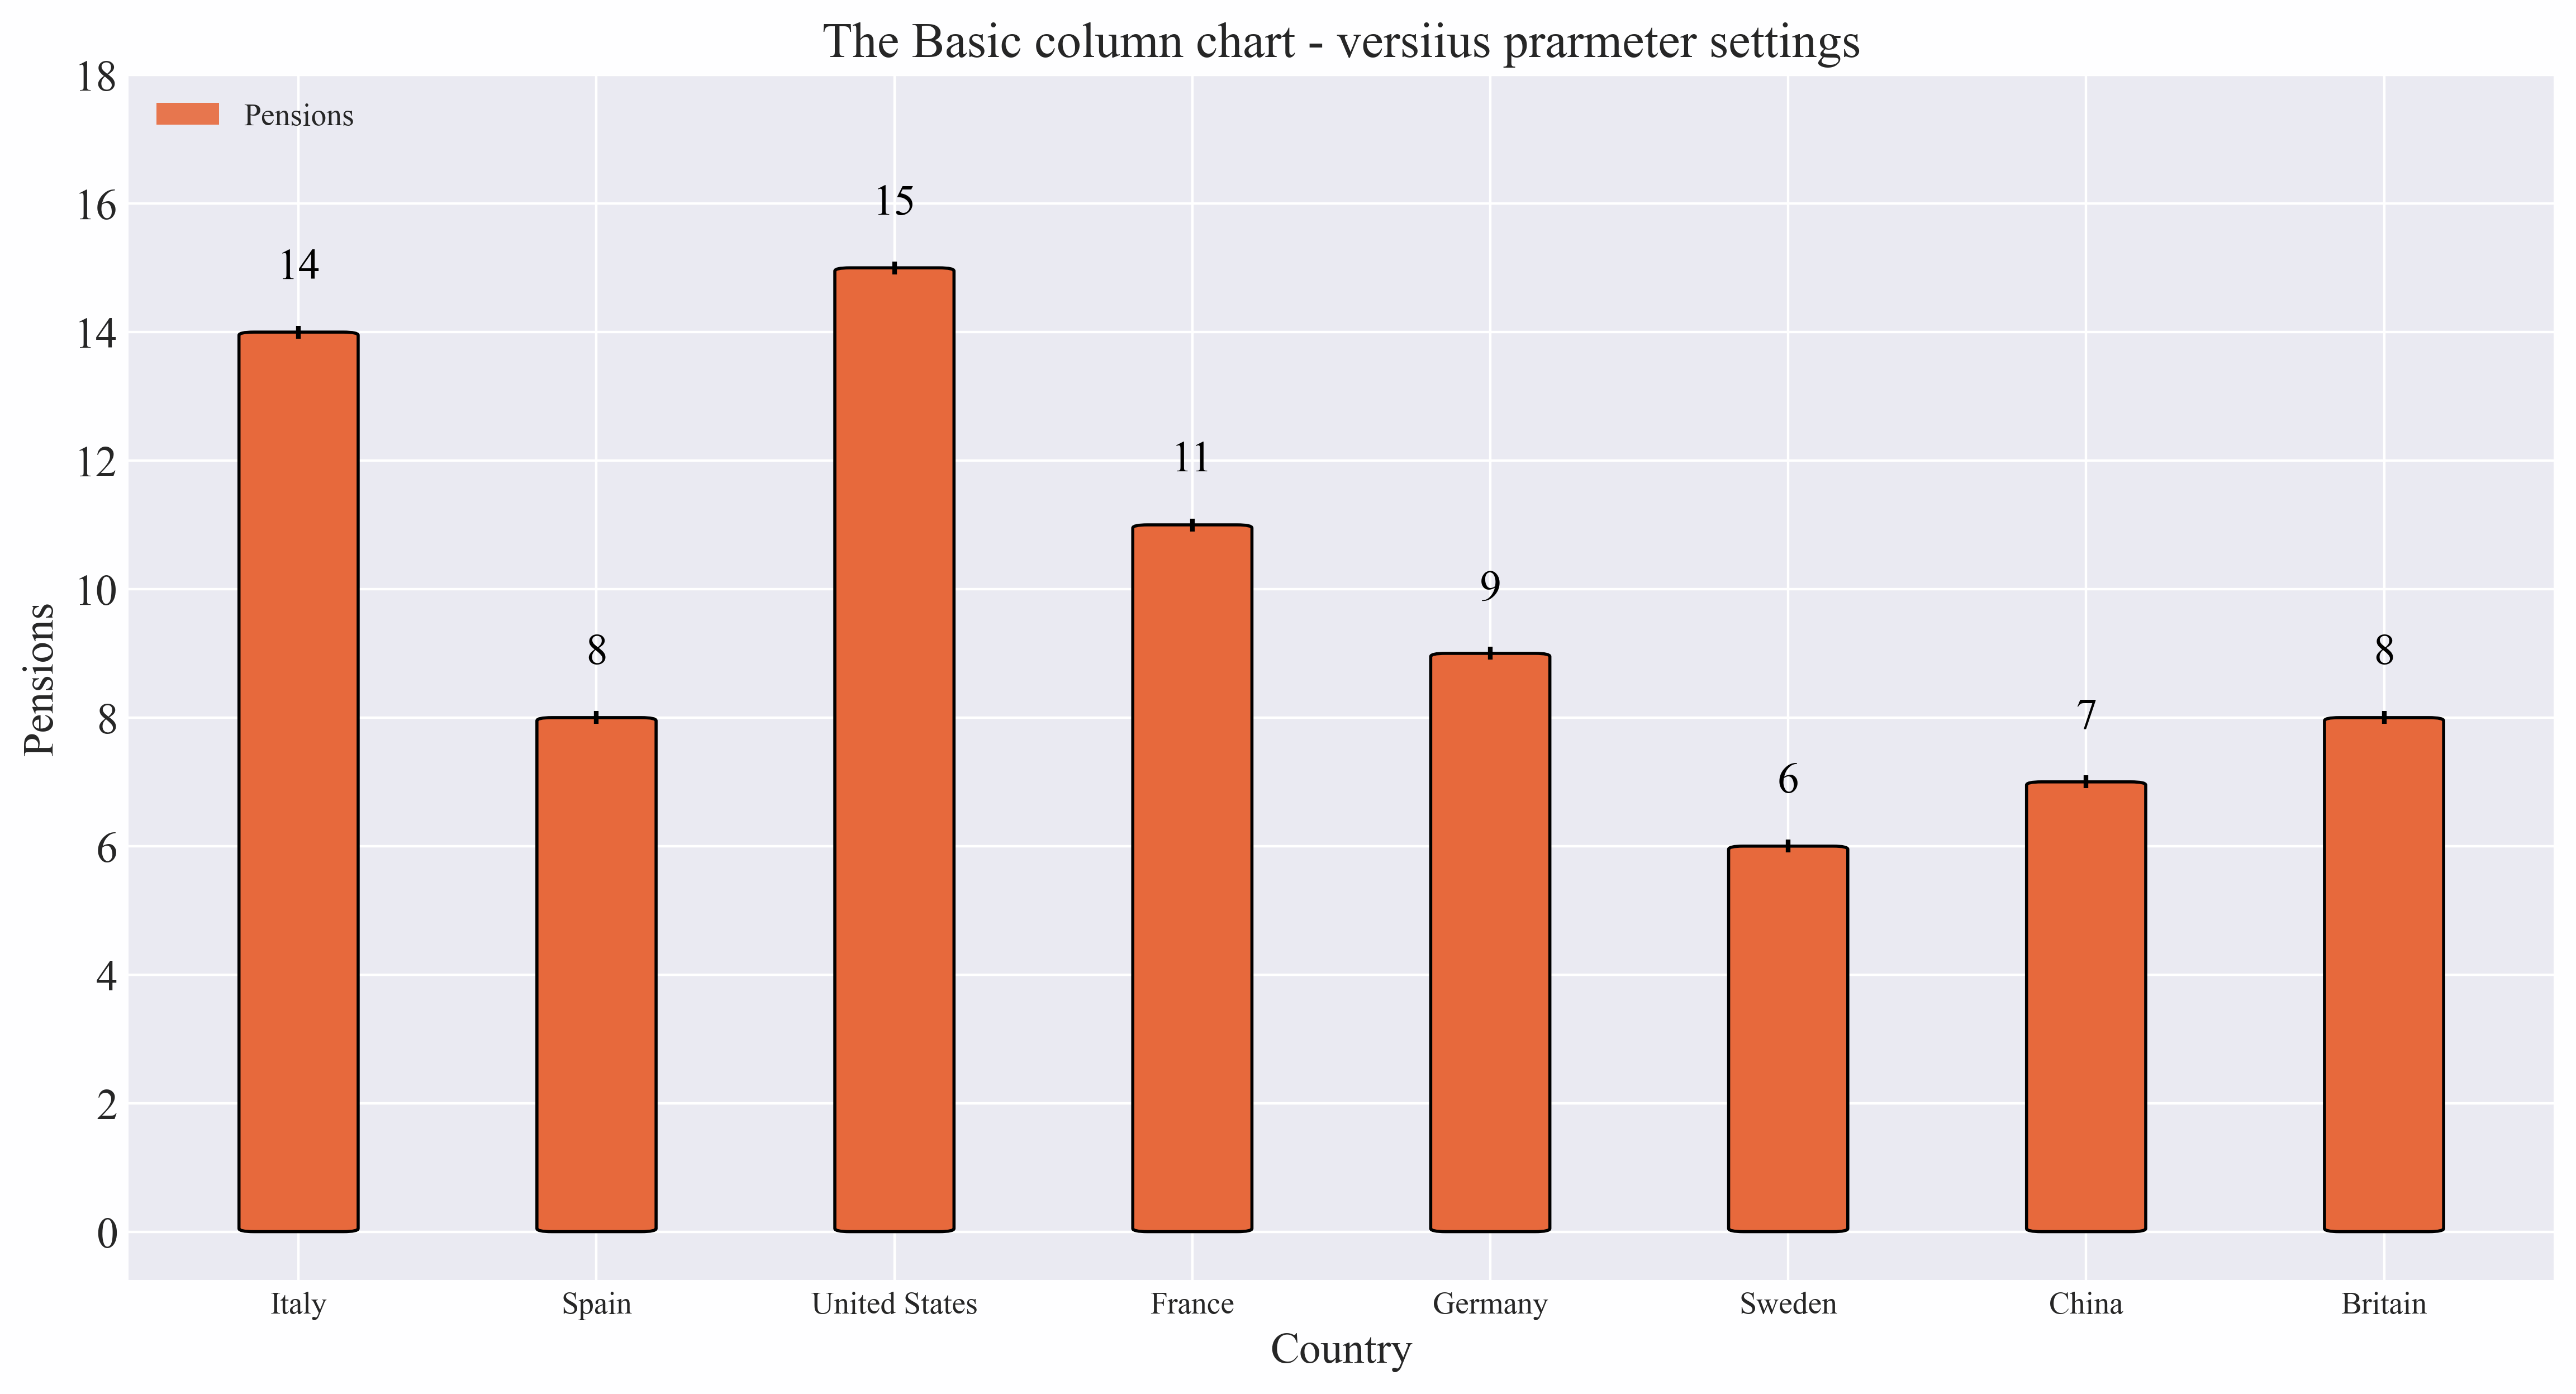

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotx
plt.rcParams['font.sans-serif'] = 'Times New Roman'  # 设置全局默认无衬线字体为罗马字体
from matplotlib.patches import FancyBboxPatch   # 从matplotlib的patches模块中导入FancyBboxPatch，用于创建复杂的边框样式

# 读取数据并提取x、y轴数据
data = pd.read_csv('./data/stack_data_bar.csv')  # 读取指定路径的CSV数据文件，存储为DataFrame
x = data['Country']   # 从数据中提取'Country'列作为x轴数据
y = data['Pensions']  # 从数据中提取'Pensions'列（养老金数据）作为y轴数据

with plt.style.context(matplotx.styles.pitaya_smoothie['light']):  # 使用matplotx的pitaya_smoothie浅色主题作为绘图上下文
    plt.figure(figsize=(14,7),dpi=400) # 创建一个图形对象，设置画布大小为14x7英寸，分辨率为400dpi
    # 绘制原始直角柱状图，存储柱子对象到rects (后续用于替换为圆角)
    rects = plt.bar(
        x,    # x轴数据（国家名称）
        height = y,     # 每个柱子的高度（养老金数值）
        width = .4,      # 柱子的宽度为0.4
        color = '#e7693c', # 柱子的填充颜色为橙红色（十六进制颜色编码）
        alpha = .9,   # 柱子透明度为0.9
        yerr = [.1, .1, .1, .1, .1, .1, .1, .1],  # 为每个柱子添加误差线，误差均值为0.1
        label = 'Pensions',  # 设置该组数据的标签为'Pensions'(用于图例)
        bottom = [0,0,0,0,0,0,0,0],  # 每个柱子的起始位置 (底部坐标) 均为0
        align = 'center',  # 柱子在x轴上的对齐方式均为居中对齐 
    ) # 结束bar函数的调用

    # 替换原始直角柱子为圆角柱子
    ax = plt.gca()  # 获取当前坐标轴对象（后续添加圆角柱子用）
    for rect in rects:  # 遍历所有原始直角柱子
        rect.remove()  # 先删除原始直角柱子，避免与圆角柱子重叠
    for rect in rects:  # 再次遍历原始柱子（仅获取位置和尺寸信息）
        bb = rect.get_bbox()  # 获取原始柱子的边界框（包含xmin/ymin/width.height）
        # 创建圆角柱子补丁（FancyBboxPatch）
        patch = FancyBboxPatch(
            (bb.xmin, bb.ymin),   # 圆角柱子左下角坐标（与原始柱子完全对齐）
            abs(bb.width), abs(bb.height),   # 圆角柱子宽高（与原始柱子一致）
            boxstyle="Round, pad=0, rounding_size=0.05",  # 修正参数名，bxstyle->boxstyle，设置圆角样式
            ec = "black",  # 柱子边框色：黑色（勾勒轮廓）
            fc = "#e7693c",  # 柱子填充色：与原始柱子一致
        )
        ax.add_patch(patch)  # 将圆角柱子添加到坐标轴上

    # 设置图表高度、标题和标签
    plt.yticks(range(0,20,2),fontproperties='Times New Roman',fontsize = 14)  # 设置y轴刻度：范围从0到20，步长为2；字体为罗马字体，字号14
    plt.title('The Basic column chart - versiius prarmeter settings',fontsize = 16)  # 设置图表标题，内置指定
    plt.xlabel('Country',fontsize = 14)  # 设置x轴的标签和字号
    plt.ylabel('Pensions', fontsize = 14)  # 设置y轴的标签和字号  

    # 在柱子顶部添加数值标签
    for i in range(len(x)):  # 遍历每个柱子的索引
        plt.text(
            x[i], y[i]+1,  # 文本位置：x轴为国家名，y轴为养老金+1（避免遮挡）
            y[i],  # 显示的数值：养老金数值
            fontsize=14,
            va='center', ha='center',  # 垂直/水居中对齐
            fontproperties='Times New Roman',
            color='black'
        )
        
    # 显示图例与保存图表
    plt.legend(loc=2)  # 显示图例，位置为左上角
    plt.savefig('./output_image/bar_02.pdf', dpi=300, bbox_inches='tight', pad_inches=0.0)  # 保存图表
    plt.show()

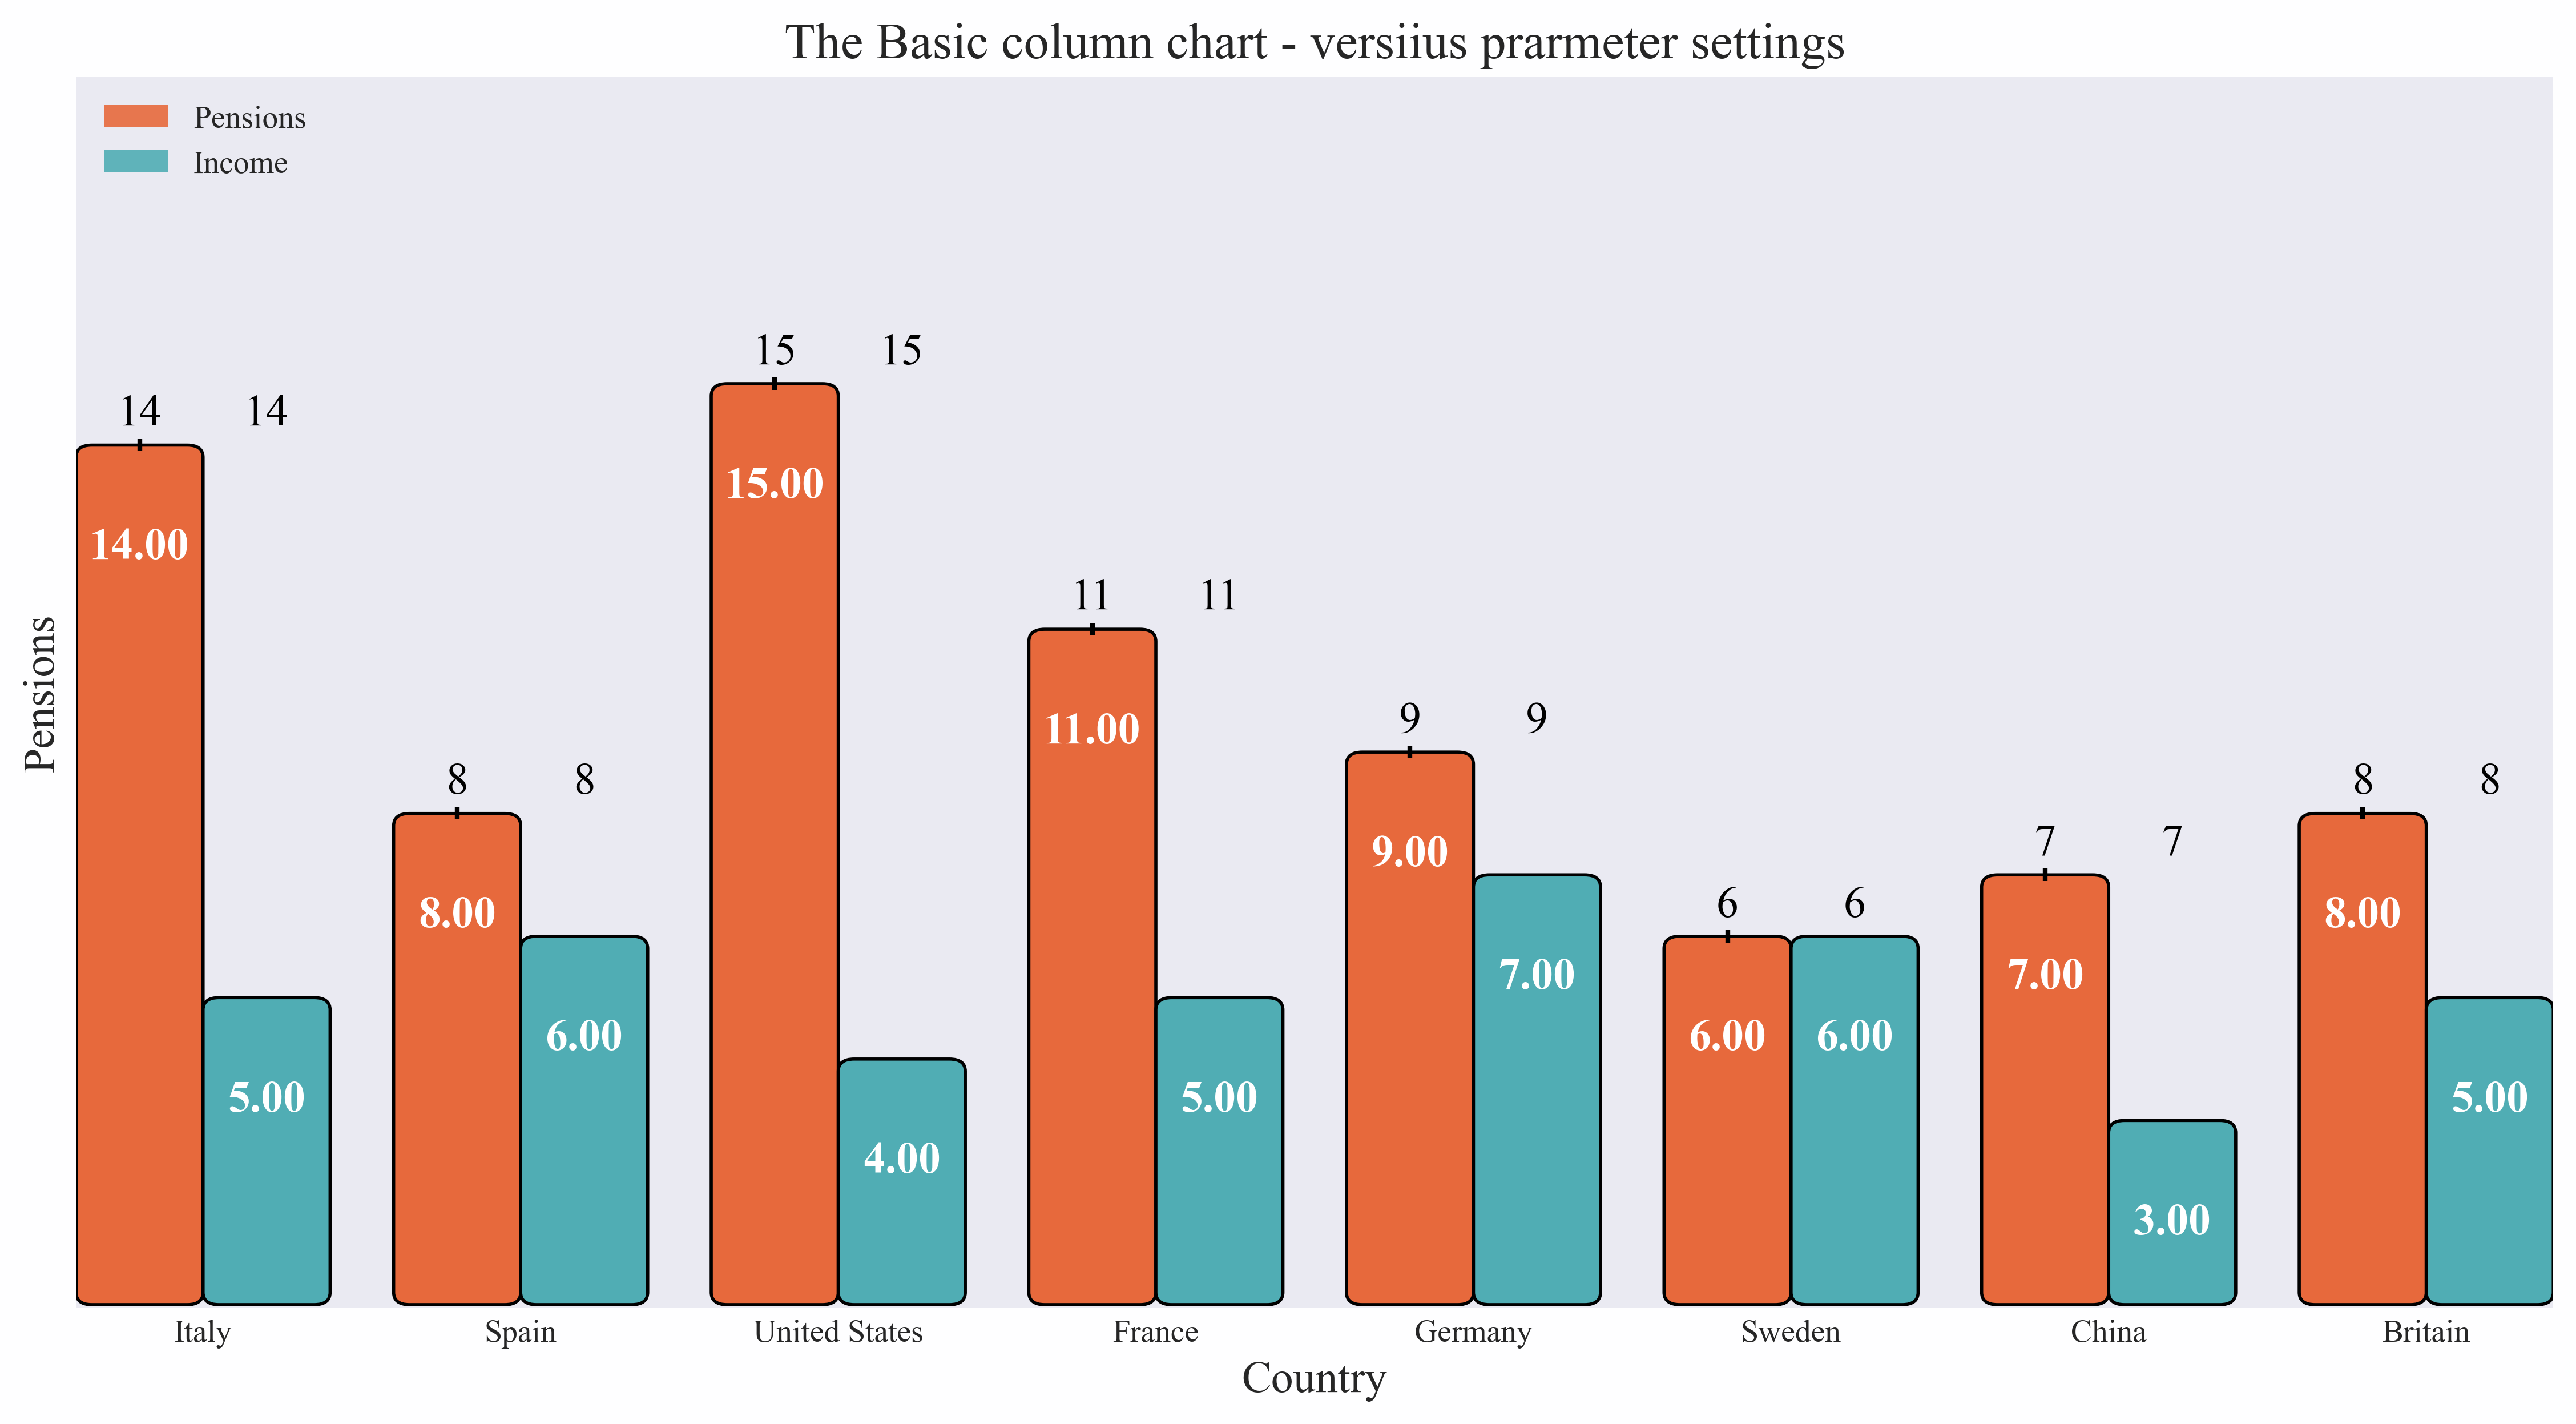

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotx
plt.rcParams['font.sans-serif'] = 'Times New Roman'  # 设置全局默认无衬线字体为罗马字体
from matplotlib.patches import FancyBboxPatch   # 从matplotlib的patches模块中导入FancyBboxPatch，用于创建复杂的边框样式

# 读取数据
data = pd.read_csv('./data/stack_data_bar.csv')
data.head()
# 从data中图提取国家列
x = data['Country']
# 从data中提取养老金列
y = data['Pensions']  # 养老金
# 从data中提取收入列 
y1 = data['Income']   # 收入

# 定义函数，将原始直角柱子转换为圆角柱子
# 参数说明：rects-原始柱子对象，ec-边框颜色（默认黑色），fc-填充颜色（默认橙红色）
def get_round_rect(rects, ec="black", fc="#e7693c"):
    # 获取原始柱子的边界框（Bbox），包含位置（xmin, ymin）和尺寸（width, height）
    bb = rects.get_bbox()
    # 创建圆角柱子（FancyBboxPath）
    patch = FancyBboxPatch(
        (bb.xmin, bb.ymin),   # 圆角柱子左下角坐标（与原始柱子完全对齐）
        abs(bb.width), abs(bb.height),   # 圆角柱子宽高（与原始柱子一致）
        boxstyle="Round, pad=0, rounding_size=0.05",  # 修正参数名，bxstyle->boxstyle，设置圆角样式
        ec = ec,  # 柱子边框色：黑色（勾勒轮廓）
        fc = fc,  # 柱子填充色：与原始柱子一致
        mutation_aspect=4,  # 修正参数名：表示下划线+去空格
        mutation_scale=1, # 补丁缩放比例（1为原始尺寸）
    )
    return patch  # 返回创建的圆角柱子

# 设置绘图风格
with plt.style.context(matplotx.styles.pitaya_smoothie['light']):  # 使用matplotx的pitaya_smoothie浅色主题作为绘图上下文
    plt.figure(figsize=(14,7),dpi=400) # 创建一个图形对象，设置画布大小为14x7英寸，分辨率为400dpi
    # 定义x轴坐标
    x1 = np.arange(len(x))  # x1为0,1,2...（与国家数量一致）

    # 绘制第一组直角柱状图（养老金），存储柱子对象到rects
    rects = plt.bar(
        x1 - 0.2,    # x轴的位置，左移0.2，与第二个柱子错开
        height = y,     # 每个柱子的高度（养老金数值）
        width = 0.4,     # 柱子的宽度为0.4
        color = '#e7693c', # 柱子的填充颜色为橙红色（十六进制颜色编码）
        alpha = 0.9,  # 柱子透明度为0.9
        yerr = [.1, .1, .1, .1, .1, .1, .1, .1],  # 为每个柱子添加误差线，误差均值为0.1
        label = 'Pensions',  # 设置该组数据的标签为'Pensions'(用于图例)
        align = 'center',  # 柱子在x轴上的对齐方式均为居中对齐 
    ) # 结束bar函数的调用

    # 绘制第二组直角柱状图（收入），存储柱子对象到rects1
    rects1 = plt.bar(
        x1 + 0.2,    # x轴的位置，右移0.2，与第一个柱子错开
        height = y1,     # 高度：收入数值
        width = 0.4,     # 柱子的宽度为0.4
        color = '#50adb4', # 柱子的填充颜色为蓝绿色（十六进制颜色编码）
        alpha = 0.9,  # 柱子透明度为0.9
        label = 'Income',  # 设置该组数据的标签为'Income'(用于图例)
        align = 'center',  # 柱子在x轴上的对齐方式均为居中对齐 
    ) # 结束bar函数的调用

    # 获取当前坐标轴对象，用于添加圆角柱子
    ax = plt.gca()

    # 遍历两组原始柱子，替换为圆角柱子
    for rect, rect_1 in zip(rects, rects1):
        rect.remove()  # 移除第一组原始直角柱子
        rect_1.remove()  # 移除第二组原始直角柱子
        # 生成第一组圆角柱子（默认橙红色）
        patch1 = get_round_rect(rect)
        # 生成第二组圆角柱子（指定蓝绿色）
        patch2 = get_round_rect(rect_1, fc="#50adb4")
        ax.add_patch(patch1)  # 添加圆角柱子
        ax.add_patch(patch2)  # 添加圆角柱子

    # 设置x轴刻度：位置为x1，标签为国家名称
    plt.xticks(x1, x)
    # 设置y轴范围：-0.05到20（避免柱子底部与坐标轴重叠）
    plt.ylim(-0.05, 20)
    # 设置y轴刻度：0到20，步长2，字体为Times News Roman
    plt.yticks(range(0, 20, 2), fontproperties="Times New Roman", fontsize=14)
    # 设置图表标题：字号16
    plt.title('The Basic column chart - versiius prarmeter settings',fontsize = 16)
    plt.xlabel('Country',fontsize = 14)  # 设置x轴的标签和字号
    plt.ylabel('Pensions', fontsize = 14)  # 设置y轴的标签和字号  
    # 显示柱子顶部数值，保留2位小数
    matplotx.show_bar_values("{:.2f}")

    # 为两组柱子添加顶部数值标签
    for i in range(len(x)):
        # 第一组（养老金）标签：x坐标左移0.2，y坐标在柱子顶部+0.5
        plt.text(
            x1[i] - 0.2, y[i] + 0.5, y[i],
            fontsize=14,
            va='center', ha='center', #垂直/水平居中
            fontproperties="Times New Roman",
            color='black'
        )
        # 第二组（收入）标签：x坐标右移0.2，y坐标在柱子顶部+0.5
        plt.text(
            x1[i] + 0.2, y[i] + 0.5, y[i],
            fontsize=14,
            va='center', ha='center', #垂直/水平居中
            fontproperties="Times New Roman",
            color='black'
        )
    # 显示图例：位置左上角
    plt.legend(loc=2) 
    # 保存图表
    plt.savefig('./output_image/bar_03.pdf', dpi=300, bbox_inches='tight', pad_inches=0.0)  # 保存图表
    plt.show()

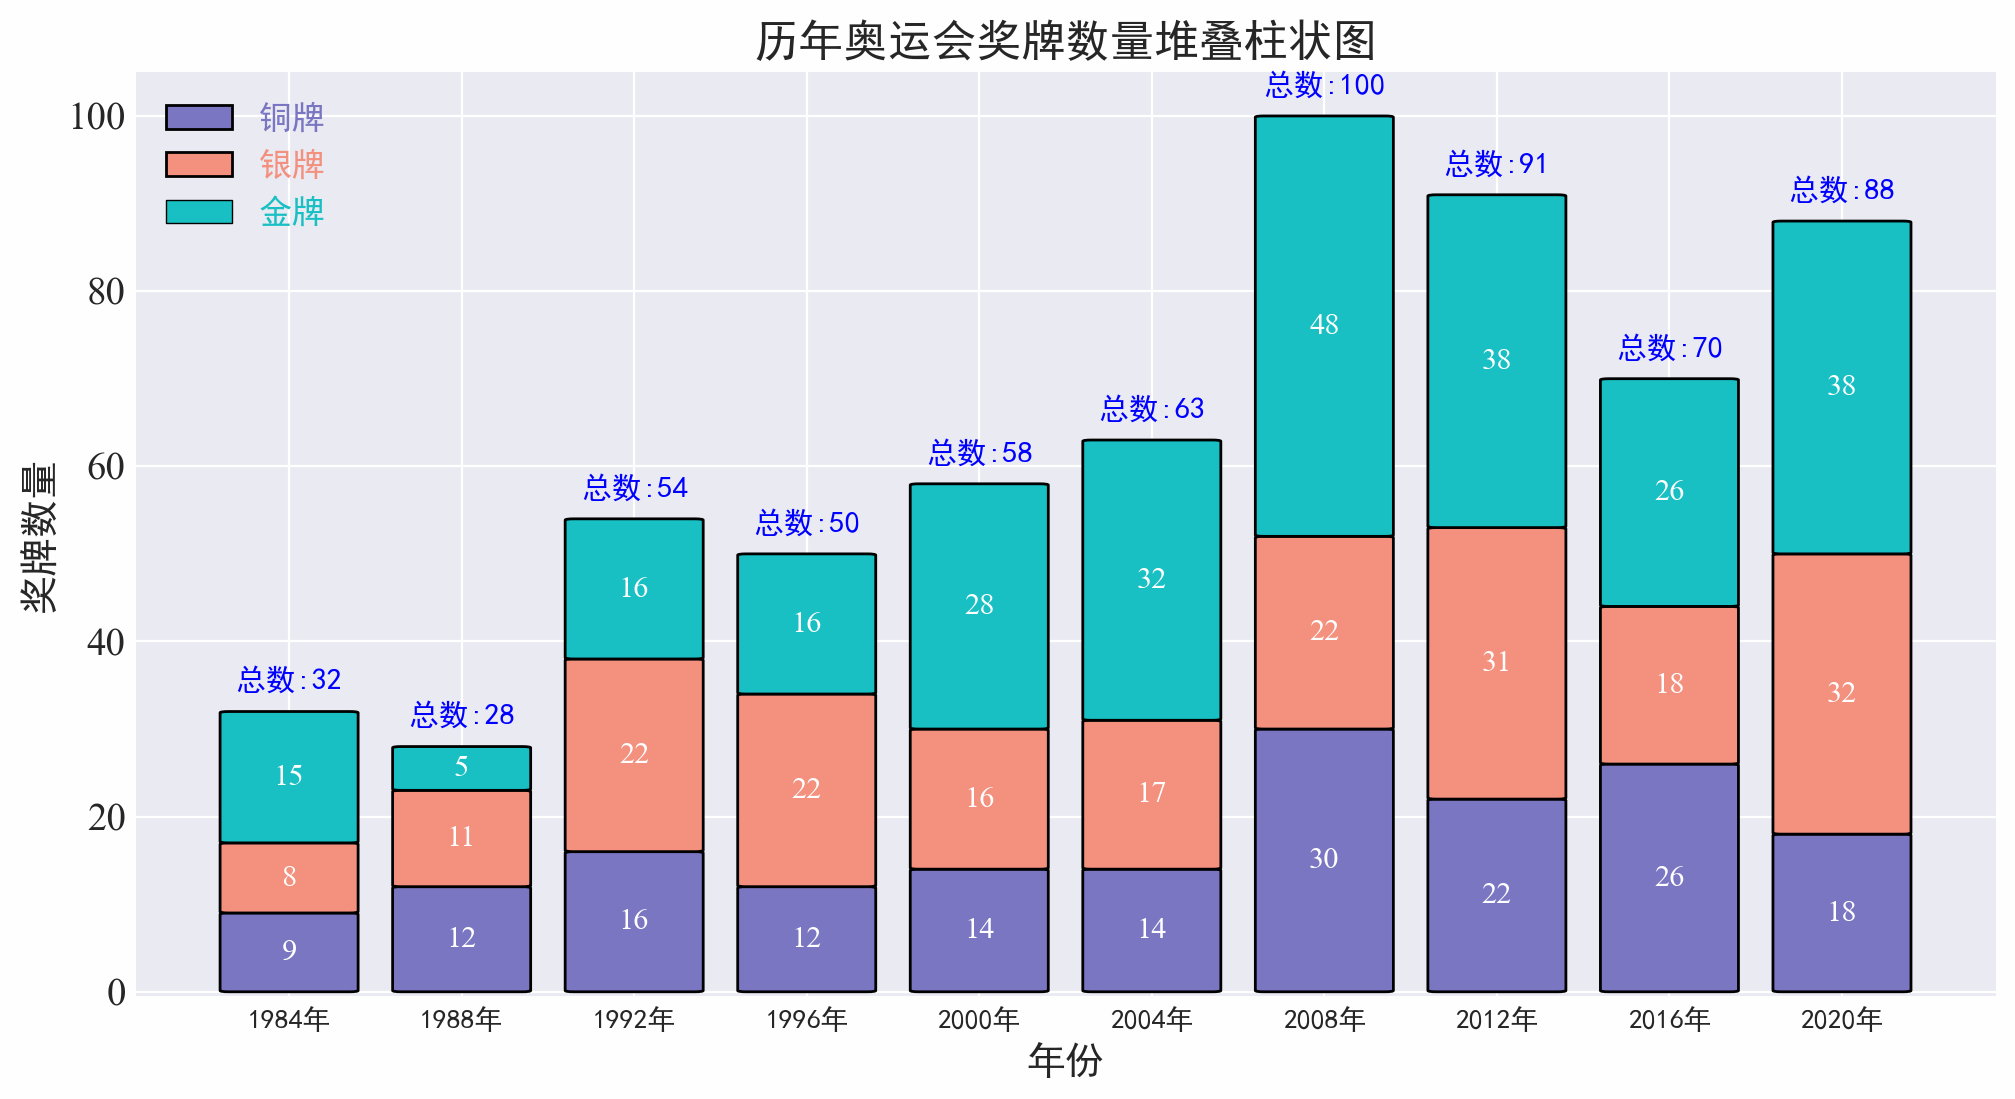

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotx
from matplotlib.patches import FancyBboxPatch   # 从matplotlib的patches模块中导入FancyBboxPatch，用于创建复杂的边框样式

# 读取数据与预处理（一次性完成数据加载和格式转换）
data = pd.read_excel('./data/奖牌.xlsx')
data.head()

# 提取x轴标签，从data的"赛事"列中提取所有数据并转换为列表，对每个赛事提取钱5个字符（简化标签，避免x轴拥挤）
x = [i[:5] for i in data['赛事'].tolist()]
# 提取奖品数量，从data中分别提取"金牌""银牌""铜牌"列的数据，转换为列表后存储到对应变量
y_gold = data['金牌'].tolist()  # 金牌数量列表
y_silver = data['银牌'].tolist()  # 银牌数量列表
y_bronze = data['铜牌'].tolist()  # 铜牌数量列表

# 3.全局绘图参数设置（仅设置一次，确保图表风格统一，避免重复设置）
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置坐标轴符号正常显示
plt.rcParams['axes.unicode_minus'] = False     # 解决坐标轴负号显示异常问题

# 4. 定义圆角柱子转换函数（封装圆角处理逻辑，优化参数命名）
def get_round_rect(rects, ec="black"):
    """
    将原始直角柱子转换为圆角柱子的工具函数
    参数：
        rects：原始plt.bar()函数返回的柱子对象（包含位置和尺寸信息）
        ec: 柱子边框颜色，默认值为黑色 ("black")
    返回：
        patch：转换后的圆角柱子对象（FancyBboxPath实例）
    """
    # 调用原始柱子的getbbox()方法，获取其边界框（Bbox对象），包含左下角坐标、宽度和高度等尺寸信息
    bb = rects.get_bbox()
    # 调用原始柱子的get_facecolod()方法，自动继承其填充颜色（无需手动传入，减少颜色匹配错误）
    fill_color = rects.get_facecolor()
    # 调用原始柱子对象（FancyBboxPatch），参数设置
    patch = FancyBboxPatch(
        (bb.xmin, bb.ymin),   # 圆角柱子左下角坐标（与原始柱子完全对齐）
        abs(bb.width), abs(bb.height),   # 圆角柱子宽高（与原始柱子一致）
        boxstyle="Round, pad=0, rounding_size=0.05",  # 修正参数名，bxstyle->boxstyle，设置圆角样式
        ec = ec,  # 柱子边框色：黑色（勾勒轮廓）
        fc = fill_color,  # 柱子填充色：与原始柱子一致
        mutation_aspect=3,  # 修正参数名：表示下划线+去空格 比例一致
        mutation_scale=1, # 补丁缩放比例（1为原始尺寸）
    )
    return patch  # 返回创建好的圆角柱子对象

# 5. 绘制堆叠圆角柱状图（核心逻辑：自动计算堆叠底部的位置，避免手动求和）
# 使用matplox浅色风格
with plt.style.context(matplotx.styles.pitaya_smoothie['light']):
    # 创建图形对象，设置画布尺寸
    plt.figure(figsize=(12, 6), dpi=200)

    # -------
    # 关键优化：自动计算堆叠底部位置
    # 原理：下一层柱子的底部位置 = 上一层柱子的高度总和，无需手动写求和逻辑
    # ------
    # 绘制第1层柱子（铜牌）：作为最下层，底部从y=0开始
    rects_bronze = plt.bar(
        x,  # x轴标签，简化后的赛事名称
        y_bronze,  # 柱子高度：铜牌数量
        label="铜牌",  # 柱子标签：用于图里识别
        edgecolor='black',  # 柱子边框颜色：黑色
        linewidth=1  # 柱子的边框高度：1像素
    )
    # 绘制第2层柱子（银牌）：堆叠在铜牌上方，底部位置为铜牌的高度
    rects_silver = plt.bar(
        x,  # x轴标签，与铜牌注意一致（同赛事）
        y_silver,  # 柱子高度：银牌数量
        bottom=y_bronze, # 底部位置：用于图例识别
        label="银牌",  # 柱子标签：用于图里识别
        edgecolor='black',  # 柱子边框颜色：黑色
        linewidth=1  # 柱子的边框高度：1像素
    )
    # 绘制第3层柱子（金牌）：堆叠在银牌上方，底部位置为铜牌+银牌的高度总和
    # 利用列表推导式自动计算每组赛事的铜牌+银牌数量总和，作为金牌柱子的底部位置（适配任意数据长度）
    bottom_gold = [b + s for b, s in zip(y_bronze, y_silver)]
    rects_gold = plt.bar(
        x,  # x轴标签，与银、铜牌柱子一致（同赛事）
        y_gold,  # 柱子高度：金牌数量
        bottom=bottom_gold,   # 底部位置：自动计算铜牌+银牌总和（确保正确堆叠）  
        label="金牌",  # 柱子标签：用于图里识别
        edgecolor='black',  # 柱子边框颜色：黑色
        linewidth=0.5  # 柱子的边框高度：1像素
    )

    # 6. 将原始直角柱子替换为圆角柱子（统一遍历处理，减少重复代码）
    ax = plt.gca()  # 调用gca()获取当前图表的坐标轴对象（Axes），用于添加圆角柱子
    # 整合三组柱子对象到列表中，便于批量处理（避免对每组柱子单独写循环，简化操作）
    all_rects = [rects_bronze, rects_silver, rects_gold]
    # 遍历每组柱子（铜牌、银牌、金牌）
    for rect_group in all_rects:
        # 遍历组内的每个柱子
        for rect in rect_group:
            rect.remove()  # 先删除原始的直角柱子，避免与圆角柱子重叠
            round_patch = get_round_rect(rect)  # 调用自定义函数生成对应的圆角柱子
            ax.add_patch(round_patch)  # 将生成的圆角柱子添加到坐标轴上（一次性全部添加，避免一个一个添加）

    # 7. 设置图表的标签、刻度和图例（确保中文显示）
    # 设置y轴刻度，范围0到120，步长为20（包含0,20,40,...,120）字体使用罗马子图 字号14
    plt.yticks(
        range(0, 121, 20),  # 刻度位置，从0到120，步长为20（到121确保包含120）
        fontproperties='Times New Roman',  # 刻度文字字体
        fontsize=14  # 刻度文字字号
    )
    # 设置图表标题：内容为"历年奥运会奖品数量堆叠柱形图"，使用微软雅黑字体，字号16
    plt.title('历年奥运会奖牌数量堆叠柱状图', fontsize=16)
    # 设置x轴标签：内容为"年份"，使用微软雅黑字体，字号14
    plt.xlabel('年份', fontsize=14)
    # 设置y轴标签，内容为"奖牌数量"，使用微软雅黑字体，字号14
    plt.ylabel('奖牌数量',fontsize=14)
    # 显示图例，位置左上角（loc=2）图例标签颜色与柱子颜色一致（labelcolor='markerfacecolor'）
    plt.legend(loc=2, labelcolor='markerfacecolor', fontsize=12)

    # 8. 为柱子添加内部数值标签和总数标签（自动计算位置、避免手动调整）
    # 遍历每个赛事的索引（从0到len(x)-1），为每组堆叠柱子添加标签
    for i in range(len(x)):
        # 铜牌柱子内部标签：显示铜牌数量，位于柱子垂直居中位置
        plt.text(
            i,  # x轴坐标，与当前赛事的柱子对齐
            y_bronze[i]/2, # y坐标：铜牌数字高度的1/2（垂直居中）
            str(y_bronze[i]),  # 显示内容：铜牌数量（转换为字符串避免数值类型异常）
            va='center', ha='center',  # 对齐方式：垂直居中 (va) 和水平居中 (ha)
            fontproperties='Times New Roman',  # 字体罗马
            color='white',  # 文字颜色：白色（与柱子颜色对比，清晰可见）
            fontsize=11  # 字号11（小于坐标轴标签，避免过大）
        )
        # 银牌柱子内部标签：显示银牌数量，位于柱子垂直居中位置
        plt.text(
            i,  # x轴坐标，与当前赛事的柱子对齐
            y_bronze[i] + y_silver[i]/2, # y坐标：铜牌高度 + 银牌高度
            str(y_silver[i]),  # 显示内容：银牌数量（转换为字符串）
            va='center', ha='center',  # 对齐方式：垂直居中 (va) 和水平居中 (ha)
            fontproperties='Times New Roman',  # 字体罗马
            color='white',  # 文字颜色：白色（与柱子颜色对比，清晰可见）
            fontsize=11  # 字号11（小于坐标轴标签，避免过大）
        )
        # 金牌柱子内部标签：显示银牌数量，位于柱子垂直居中位置
        plt.text(
            i,  # x轴坐标，与当前赛事的柱子对齐
            (y_bronze[i] + y_silver[i]) + y_gold[i]/2, # y坐标：铜牌+银牌高度 + 金牌高度的1/2（金牌柱子垂直居中）
            str(y_gold[i]),  # 显示内容：金牌数量（转换为字符串）
            va='center', ha='center',  # 对齐方式：垂直居中 (va) 和水平居中 (ha)
            fontproperties='Times New Roman',  # 字体罗马
            color='white',  # 文字颜色：白色（与柱子颜色对比，清晰可见）
            fontsize=11  # 字号11（小于坐标轴标签，避免过大）
        )
        # 奖牌总数标签：显示当前赛事的金+银+铜总数，位于柱子顶部上方
        total = y_bronze[i] + y_silver[i] + y_gold[i]  # 计算当前赛事的奖牌总数
        plt.text(
            i,  # x轴坐标，与当前赛事的柱子对齐
            total + 2, # y坐标：总数+2（与柱子顶部保持距离，避免重叠，可根据数据调整）
            f'总数:{total}',  # 显示内容：格式化字符串，包含"总数:"和具体数值
            va='bottom', ha='center',  # 对齐方式：垂直靠下（顶部标签与柱子顶部对齐），水平居中
            fontproperties='SimHei',  # 字体：微软雅黑
            color='blue',  # 文字颜色：蓝色（与柱子颜色对比，清晰可见）
            fontsize=11  # 字号11（小于坐标轴标签，避免过大）
        )

    # 9. 自动调整y轴范围（避免手动设置固定值，适配不同数据量）
    # 计算所有赛事的奖牌总数，取最大值作为参考
    max_total = max([b + s + g for b, s, g in zip(y_bronze, y_silver, y_gold)])
    # 设置y轴范围：下限-0.5（避免柱子底部与坐标轴重叠），上限max_total + 5（确保总数标签不被截断）
    plt.ylim(-0.5, max_total + 5)

    # 10. 保存图表并显示
    plt.savefig('./output_image/bar_04.pdf', dpi=300, bbox_inches='tight', pad_inches=0.0)  # 保存图表
    plt.show()
        

数据概览：
          赛事  参赛人数  金牌  银牌  铜牌  总计  排名
0   1984年洛杉矶   216  15   8   9  32   4
1    1988年汉城   273   5  11  12  28  11
2  1992年巴塞罗那   244  16  22  16  54   4
3  1996年亚特兰大   294  16  22  12  50   4
4    2000年悉尼   271  28  16  14  58   3

数据维度: (10, 7)

图表已保存至：./output_image/bar_05.pdf 和 bar_05.pdf


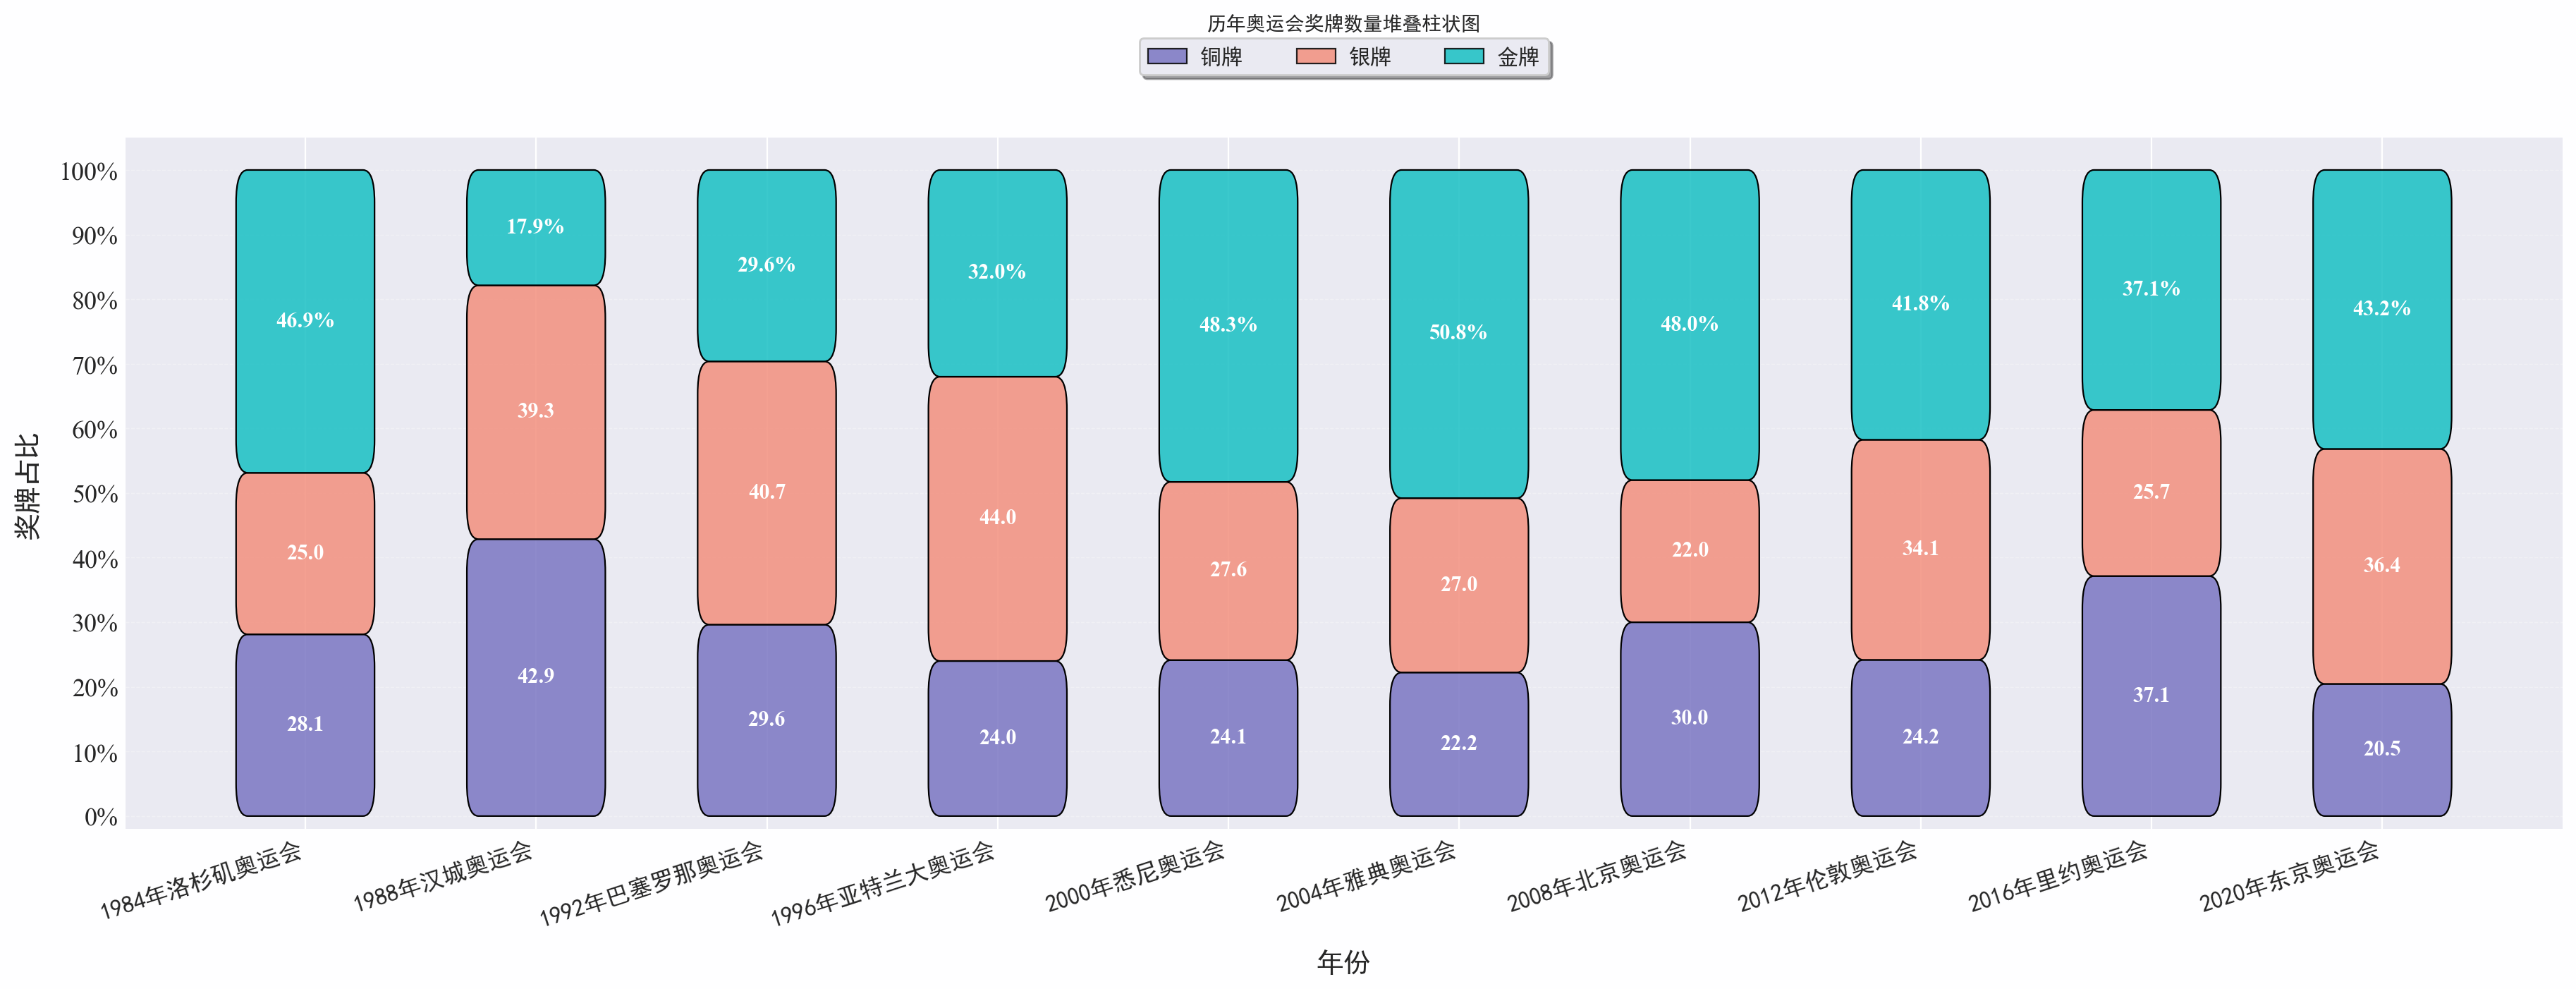

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotx
from IPython.core.pylabtools import figsize
# 从matplotlib的font_manager模块导入FontProperties类，用于自定义字体设置
from matplotlib.font_manager import FontProperties
# 导入os库，用于处理文件和目录操作
import os

from matplotlib.patches import FancyBboxPatch
from sympy import rotations

# ======== 数据读取 ========
data = pd.read_excel('./data/奖牌.xlsx')
print("数据概览：")
print(data.head())
# 打印数据的维度（行数和列数）
print(f"\n数据维度: {data.shape}")

# ======== 数据预处理 ========
# 1.提取x轴标签，遍历data['赛事']中的每个元素，用f-string格式化为"{赛事}奥运会"作为x轴标签
x = [f"{i}奥运会" for i in data['赛事']]

# 2.计算奖牌总数：如果数据中没有"总计"列，则通过"金牌+银牌+铜牌"计算并添加该列
if '总计' not in data.columns:
    data['总计'] = data['金牌'] + data['银牌'] + data['铜牌']

# 3. 自动计算各奖牌占比（以小数形式表示，后续可转为百分比）
data['gold_prop'] = data['金牌'] / data['总计']  # 金牌占比
data['silver_prop'] = data['银牌'] / data['总计']  # 银牌占比
data['bronze_prop'] = data['铜牌'] / data['总计']  # 铜牌占比

# 4. 修正浮点数计算误差，确保每行的金、银、铜牌占比总和精确为1（避免堆叠后高度异常）
for idx in data.index:  # 遍历数据中的每一行
    # 计算当前行的占比总和
    total_prop = data.loc[idx, 'gold_prop'] + data.loc[idx, 'silver_prop'] + data.loc[idx, 'bronze_prop']
    # 如果总和与1的差值超过了1e-10（存在明显误差）
    if abs(total_prop - 1.0) > 1e-10:
        # 调整金牌占比，使总和为1（因浮点数误差通常较小，调整金牌占比影响最小）
        data.loc[idx, 'gold_prop'] = 1 - data.loc[idx, 'silver_prop'] - data.loc[idx, 'bronze_prop']

# ======== 圆角柱子转换函数 ========
def get_round_rect(rect, ec="black", lw=0.8):
    """
    将原始直角柱子转换为圆角柱子的工具函数
    参数：
        rect: 原始的直角柱子对象（由plt.bar()返回）
        ec: 柱子边框的颜色，默认值为黑色
        lw: 柱子边框的线宽，默认值为0.8
    返回:
        patch: 转换后的圆角柱子对象（FancyBboxPatch实例）
    """
    # 获取原始柱子的边界框（Bbox对象），包含位置（xmin, ymin） 和尺寸（width, height）信息
    bb = rect.get_bbox()
    # 获取原始柱子的填充颜色，使圆角柱子与原始柱子颜色一致
    fill_color = rect.get_facecolor()

    # 创建圆角柱子对象（FancyBboxPatch）
    # 调用原始柱子对象（FancyBboxPatch），参数设置
    patch = FancyBboxPatch(
        (bb.xmin, bb.ymin),   # 圆角柱子左下角坐标（与原始柱子完全对齐）
        abs(bb.width), abs(bb.height),   # 圆角柱子宽高（与原始柱子一致）
        boxstyle="Round, pad=0, rounding_size=0.05",  # 修正参数名，bxstyle->boxstyle，设置圆角样式
        ec = ec,  # 柱子边框色：黑色（勾勒轮廓）
        fc = fill_color,  # 柱子填充色：与原始柱子一致
        linewidth=lw,  # 柱子填充颜色，继承原始柱子的颜色
        mutation_scale=1, # 柱子高款比例为1（保持原始比例）
    )
    return patch  # 返回创建好的圆角柱子对象

# ======== 绘制图表 ========
# 使用matplotx风格
with plt.style.context(matplotx.styles.pitaya_smoothie['light']):
    # 创建画布和坐标轴对象
    fig, ax = plt.subplots(figsize=(18, 7), dpi=200)

    # 设置子图边距（调整图表在画布中的位置，为图例和标题预留更多空间）
    plt.subplots_adjust(left=0, right=0.96, top=0.82, bottom=0.12)
    # left=0.8：左侧边距占画布宽度的8%；right=0.96：右侧边距占4%；top=0.82：顶部边距占18%；bottom=0.12：底部边距占12%

    # 定义柱子宽度（控制柱子的粗细。0.6表示适中宽度）
    bar_width = 0.6

    # 绘制第1层柱状图：铜牌占比（最下层，底层从0开始）
    rects_bronze = ax.bar(
        x,  # x轴数据：格式化后的赛事名称
        data['bronze_prop'], # 柱子高度：铜牌占比
        width=bar_width,  # 柱子宽度
        label='铜牌',  # 柱子标签：用于图例识别
        alpha=0.85, # 透明度：0.85
        edgecolor='black',  # 柱子边框颜色
        linewidth=0.8  # 柱子边框线宽：0.8
    )

    # 绘制第2层柱状图：银牌占比（堆叠在铜牌上方）
    rects_silver = ax.bar(
        x,  # x轴数据：格式化后的赛事名称
        data['silver_prop'],  # 柱子高度：银牌占比
        width=bar_width,  # 柱子宽度
        bottom=data['bronze_prop'],  # 底部位置：从铜牌高度开始（实现堆叠）
        label='银牌',  # 柱子标签：用于图例识别
        alpha=0.85,  # 透明度：0.85
        edgecolor='black',  # 柱子边框颜色
        linewidth=0.8  # 柱子边框线宽：0.8
    )

    # 绘制第3层柱状图：金牌占比（堆叠在银牌上方）
    rects_gold = ax.bar(
        x,  # x轴数据：格式化后的赛事名称
        data['gold_prop'],  # 柱子高度：金牌占比
        width=bar_width,  # 柱子宽度
        # 底部位置：从铜牌占比+银牌占比的高度开始（实现三层堆叠）
        bottom=data['bronze_prop'] + data['silver_prop'],  # 底部位置：从铜牌高度开始（实现堆叠）
        label='金牌',  # 柱子标签：用于图例识别
        alpha=0.85,  # 透明度：0.85
        edgecolor='black',  # 柱子边框颜色
        linewidth=0.8  # 柱子边框线宽：0.8
    )

    # 整合三组柱子对象到列表中，便于批量处理（避免对每组柱子单独写循环，简化操作）
    all_rects = [rects_bronze, rects_silver, rects_gold]
    # 遍历每组柱子（铜牌、银牌、金牌）
    for rect_group in all_rects:
        # 遍历组内的每个柱子
        for rect in rect_group:
            # 调用自定义的函数生成对应的圆角柱子
            patch = get_round_rect(rect, ec='black', lw=0.8)
            rect.remove()  # 先删除原始的直角柱子，避免与圆角柱子重叠
            ax.add_patch(patch)  # 将生成的圆角柱子添加到坐标轴上（一次性全部添加，避免一个一个添加）

    # ======== 图表格式设置 ========
    # 设置Y轴刻度：0到1之间均匀分布11个刻度（对应0%到100%，步长10%）
    ax.set_yticks(np.linspace(0, 1, 11))
    # 设置Y轴刻度标签为百分比形式（0%、10%、...、100%）
    ax.set_yticklabels(
        [f"{i}%" for i in range(0, 110, 10)],  # 自动生成百分比标签
        fontproperties='Times New Roman',  # 刻度文字字体：Times New Roman（英文和数字）
        fontsize=13  # 刻度文字字号：13
    )
    # 设置Y轴数值范围：下限-0.02 (避免与柱子底部与坐标轴重叠)，上限1.05（为顶部标签预留空间）
    ax.set_ylim(-0.02, 1.05)

    # 设置图表标题
    # 设置图表标题：内容为"历年奥运会奖品数量堆叠柱形图"，使用微软雅黑字体，字号16
    ax.set_title(
        '历年奥运会奖牌数量堆叠柱状图',
        fontsize=16,
        fontweight='bold',  # 标题字体加粗
        pad=55,  # 标题与图表的间距：55（增大间距，为上方图例留出空间）
        fontproperties='SimHei'
    )

    # 设置x轴标签：内容为"年份"，使用微软雅黑字体，字号14
    ax.set_xlabel(
        '年份',
        fontsize=14,
        fontproperties='SimHei',
        labelpad=10  # 标签与X轴刻度之间的间距：10
    )
    # 设置x轴刻度位置：与x轴标签的数量一致（每个赛事对应一个刻度）
    ax.set_xticks(range(len(x)))
    # 设置x轴的刻度标签：使用格式化后的赛事名称，旋转18度避免重叠，右对齐
    ax.set_xticklabels(
        x,
        rotation=18,  # 标签旋转18度
        ha="right",  # 水平对齐方式，右对齐
        fontproperties='SimHei',  # 标签字体：黑体
        fontsize=12  # 标题字号12
    )
    # 设置y轴标签，内容为"奖牌占比"，使用微软雅黑字体，字号14
    ax.set_ylabel(
        '奖牌占比',  # Y轴标签内容
        fontsize=14,   # 标签字号14
        fontproperties='SimHei',  # 标签字体
        labelpad=10   # 标签与Y轴刻度的间距：10
    )

    # 设置图例
    legend_font = FontProperties(family='SimHei', size=11)
    # 显示图例，位置左上角（loc=2）图例标签颜色与柱子颜色一致（labelcolor='markerfacecolor'）
    ax.legend(
        loc='upper center',   # 图例基准位置：上中部
        bbox_to_anchor=(0.5, 1.16),  # 图例偏移：x=0.5(水平居中), y=1.16 (位于标题下方)
        ncol=3,  # 图例列数：3列（横向排列，节省空间）
        prop=legend_font,   # 图例字体
        frameon=True,       # 背景框为圆角矩形
        shadow=True,       # 背景框添加阴影效果
        columnspacing=2.5,  # 列之间的间距：2.5
        handlelength=1.8,   # 图例中标记（彩色方块）的长度：1.8
        handletextpad=0.6   # 标记与文字之间的间距：0.6
    )

    # 添加网格线（仅Y轴，辅助读取数值）
    ax.yaxis.grid(
        True,  # 显示Y轴网格线
        linestyle='--',  # 网格线样式：虚线
        alpha=0.3,   # 网格线透明度 0.3（不遮挡数据）
        linewidth=0.5  # 网格线宽 0.5
    )
    # 设置网格线显示在柱子下方（避免遮挡柱子）
    ax.set_axisbelow(True)

    # ======== 添加百分比标签 ========
    # 遍历每个赛事的索引（从0到len(x)-1），为占比足够大的柱子添加内部标签
    for i in range(len(x)):
        # 计算铜牌标签的位置（铜牌柱子的垂直中心）
        bronze_center = data['bronze_prop'].iloc[i] / 2
        # 仅在铜牌占比>5%时显示标签（避免占比小时标签拥挤）
        if data['bronze_prop'].iloc[i] > 0.05:
            ax.text(
                i,   # x坐标：与当前赛事的柱子对齐
                bronze_center,  # y坐标：铜牌柱子的垂直中心
                f"{data['bronze_prop'].iloc[i]*100:.1f}",  # 显示内容：铜牌占比x100，保留1位小数，加百分号
                ha='center', va='center',     # 对齐方式：水平居中（ha）和垂直居中（va）
                fontproperties='Times New Roman',     # 字体罗马字体
                color='white',   # 文字颜色：白色（与铜牌柱子颜色对比，清晰可见）
                fontsize=11,    # 字号: 11
                fontweight='bold'    # 字体加粗
            )

        # 计算银牌标签的位置（银牌柱子的垂直中心）
        silver_center = data['bronze_prop'].iloc[i] + data['silver_prop'].iloc[i] / 2
        # 仅在银牌占比>5%时显示标签
        if data['silver_prop'].iloc[i] > 0.05:
            ax.text(
                i,  # x坐标，与当前赛事的柱子对齐
                silver_center,  # y坐标：银牌柱子的垂直中心
                f"{data['silver_prop'].iloc[i]*100:.1f}",  # 显示内容：银牌占比x100，保留1位小数
                ha='center', va='center',    # 对齐方式：水平和垂直居中
                fontproperties='Times New Roman',
                color='white',
                fontsize=11,
                fontweight='bold'
            )

        # 计算金牌标签地位置（金牌柱子地垂直中心）
        gold_center = data['bronze_prop'].iloc[i] + data['silver_prop'].iloc[i] + data['gold_prop'].iloc[i] / 2
        # 仅在金牌占比>5%时显示标签
        if data['gold_prop'].iloc[i] > 0.05:
            ax.text(
                i,  # x坐标：与当前赛事地柱子对齐
                gold_center,  # y坐标：金牌柱子的垂直中心
                f"{data['gold_prop'].iloc[i]*100:.1f}%",  # 显示内容：金牌占比x100，保留1位小数
                ha='center', va='center',   # 对齐方式：水平和垂直居中
                fontproperties='Times New Roman',    # 罗马字体
                color='white',
                fontsize=11,
                fontweight='bold'
            )

# ======== 保存与显示图表 ========
# 确保输出目录存在，若不存在则创建 exist_ok=True 表示已存在时不报错
os.makedirs('./output_image', exist_ok=True)

# 保存图表
plt.savefig(
    './output_image/bar_05.pdf',  # 保存路径和姓名
    dpi=300,   # 分辨路
    bbox_inches='tight',
    pad_inches=0.2   # 图表边缘的额外边距：0.2英寸
)

print("\n图表已保存至：./output_image/bar_05.pdf 和 bar_05.pdf")
plt.show()

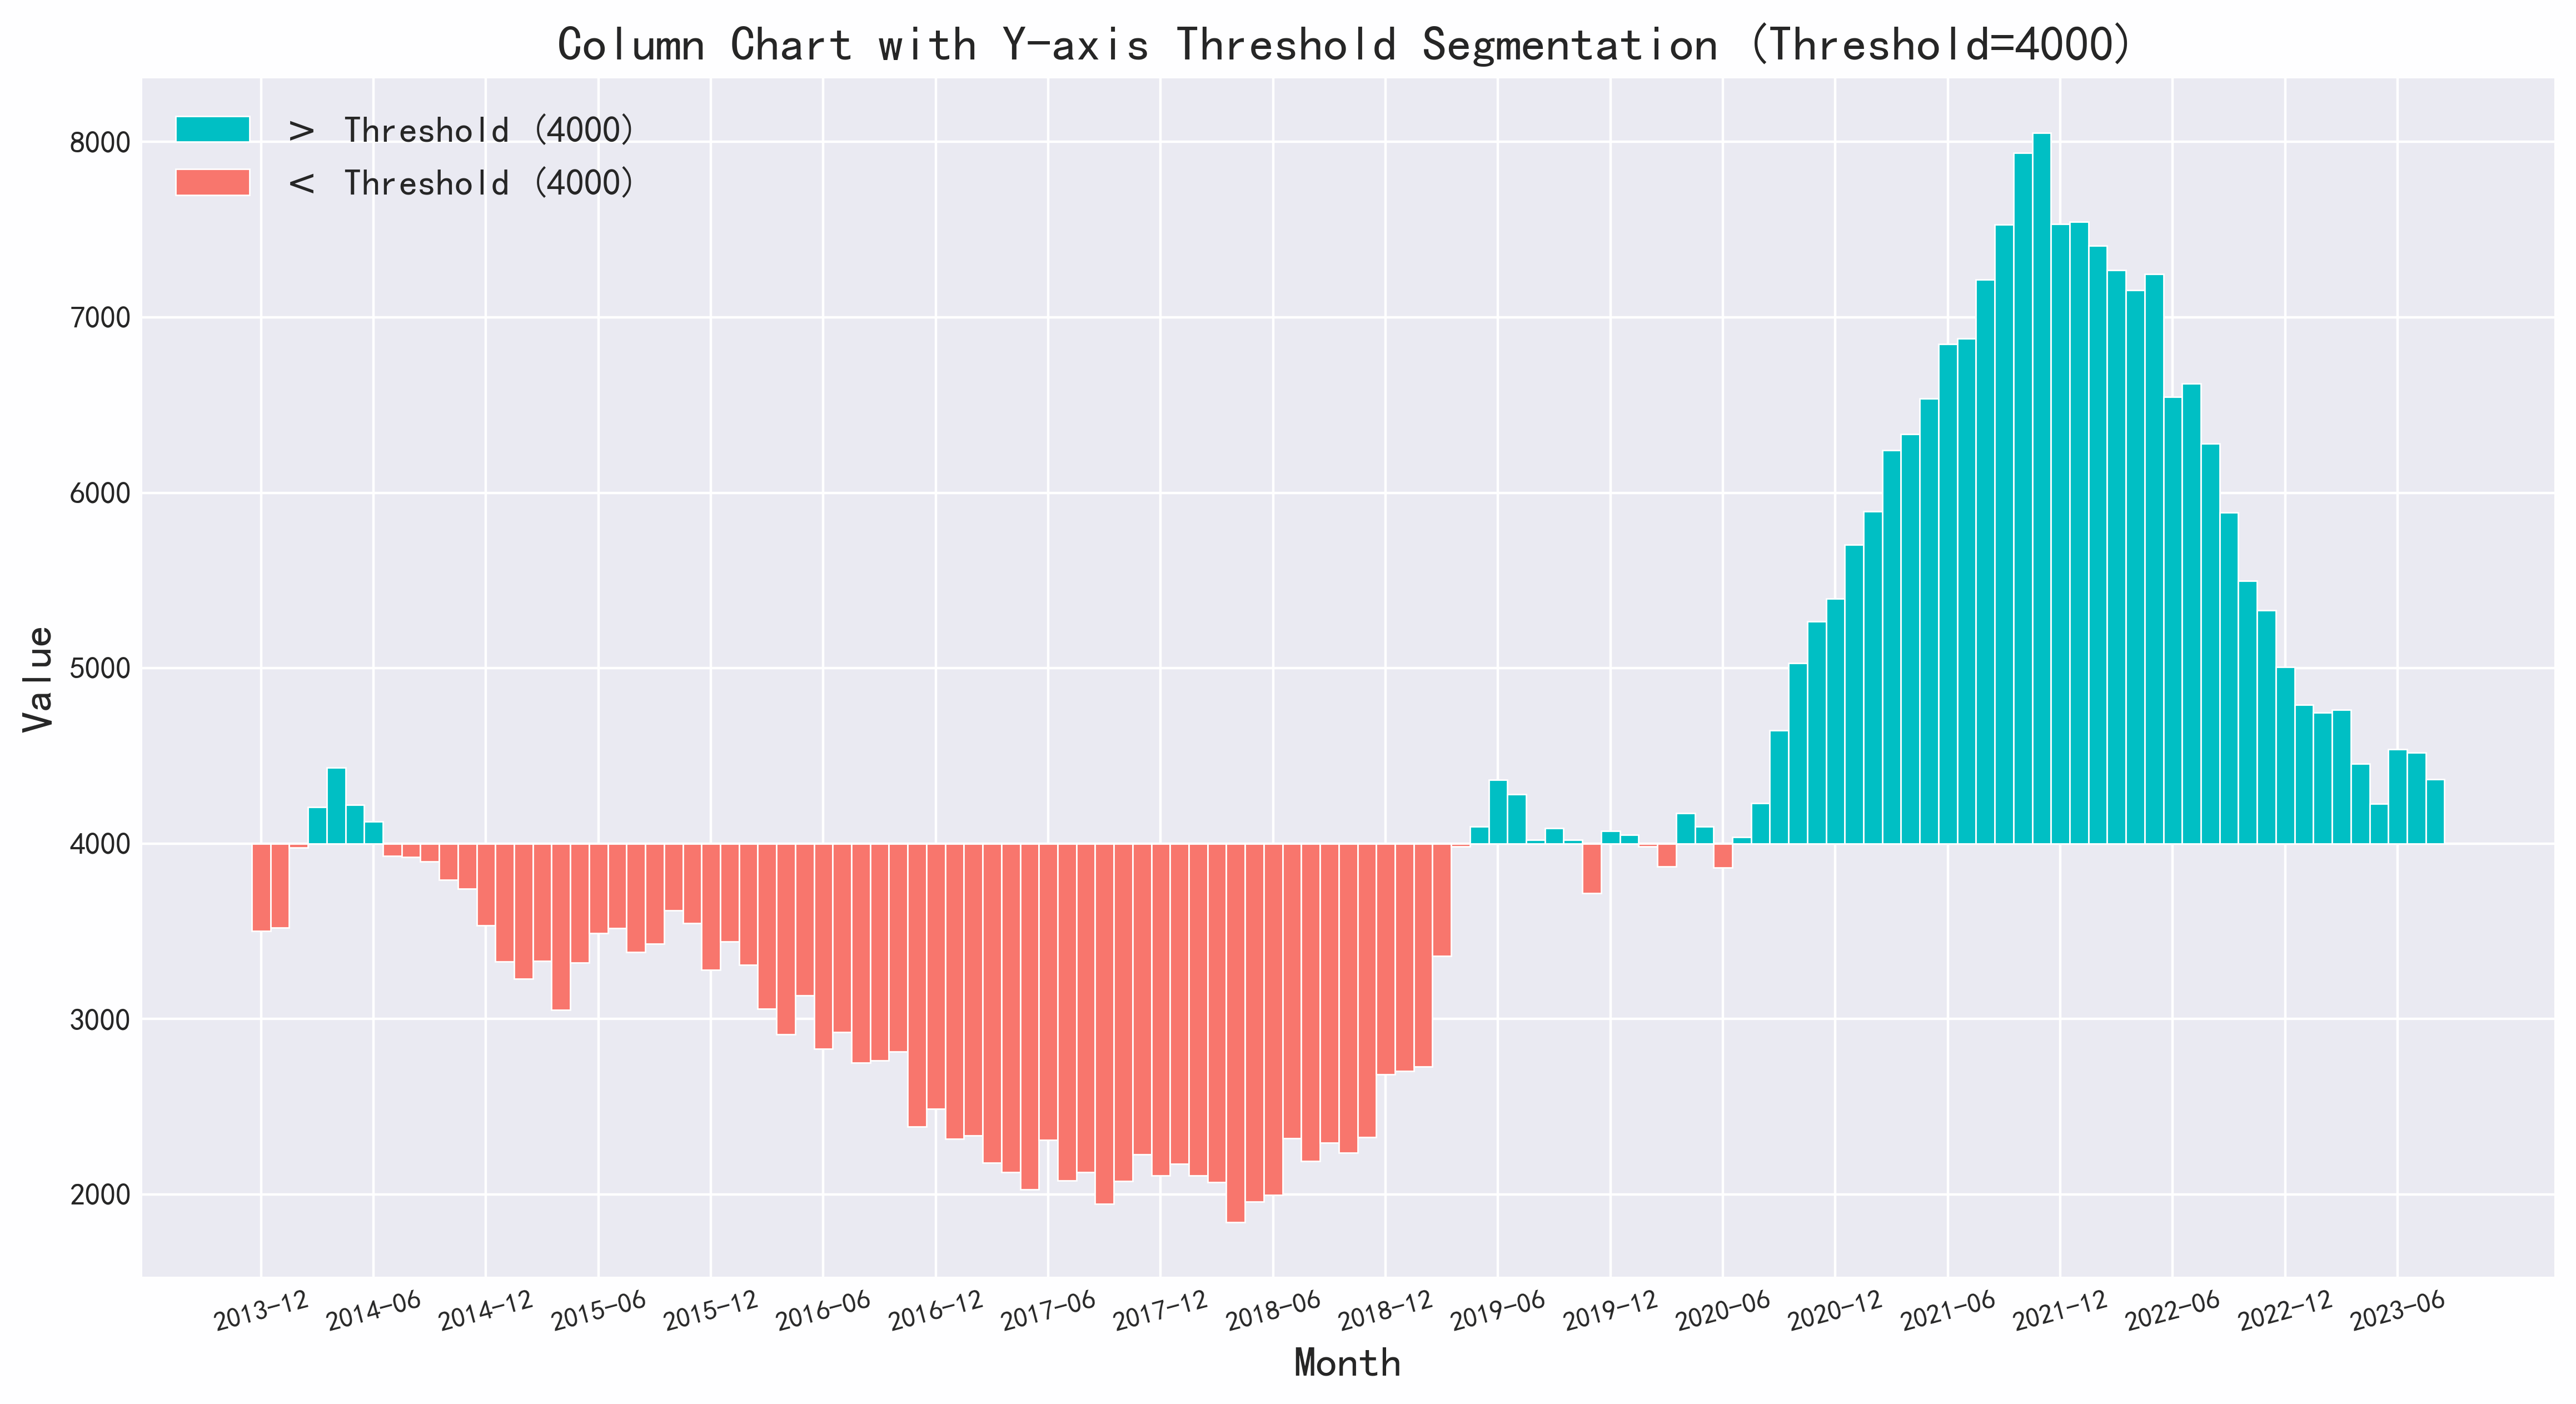

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotx
from IPython.core.pylabtools import figsize
# 从matplotlib的font_manager模块导入FontProperties类，用于自定义字体设置
from matplotlib.font_manager import FontProperties

data = pd.read_excel('./data/bar_line_data.xlsx')
# 预览数据前3行，验证数据读取正确性
data.head()

# 按阈值4000分割数据：超过4000部分位正向值，低于4000的部分位负向值
# 正向部分：值-4000 (仅当值>4000时有效，否则为0)
data['value_x1'] = data['value'].apply(lambda x: x - 4000 if x > 4000 else 0)
# 负向部分：4000-值（仅当值<=4000时有效，否则为0，后续取负实现向下延申）
data['value_x2'] = data['value'].apply(lambda x: 4000 - x if x <=4000 else 0)

# 使用matplox浅色主题
with plt.style.context(matplotx.styles.pitaya_smoothie['light']):
    plt.figure(figsize=(14, 7), dpi=400)

    # 绘制正向柱形（值>4000部分，底部为4000开始向上延伸）
    plt.bar(
        data['month'],  # x轴：月份数据
        data['value_x1'],  # y轴：超过4000的部分（正向高度）
        color='#00bfc4',   # 柱子颜色：青色
        bottom=4000,   # 柱子底部起点：阈值4000（确保从阈值处向上画）
        edgecolor='white',  # 柱子边框颜色
        linewidth=0.5,   # 边框宽度：0.5
        width=1,      # 柱子宽度
        label=r'$>$ Threshold (4000)'    # 图例标签：补充阈值说明
    )

    # 绘制负向柱形（值<=4000的部分，底部从4000开始向下延伸）
    plt.bar(
        data['month'],  # x轴：月份数据（与正向柱形对齐）
        -data['value_x2'],  # y轴：取负，实现从4000向下延伸
        color='#f8766d',   # 柱子颜色：红色
        bottom=4000,  # 柱子底部起点：阈值4000（确保从阈值处向下画）
        edgecolor='white',  # 柱子边框颜色：白色
        linewidth=0.5,  # 边框宽度: 0.5
        width=1,  # 柱子宽度：1 (与正向柱形一致)
        label=r'$<$ Threshold (4000)'    # 图例标签：补充阈值说明
    )

    # 修正x轴刻度：每6个月份显示1个刻度，旋转15°避免拥挤
    plt.xticks(
        np.arange(0, data.shape[0], 6),  # 刻度位置：从0开始，步长6
        rotation=15,   # 刻度标签旋转15°
        fontsize=9   # 增加字号
    )

    # 设置图表标题（补充阈值说明）
    plt.title('Column Chart with Y-axis Threshold Segmentation (Threshold=4000)', fontsize=16)
    # 设置x轴标签
    plt.xlabel('Month', fontsize=14)
    # 设置y轴标签
    plt.ylabel('Value', fontsize=14)

    # 显示图例（位置左上角，默认样式）
    plt.legend(loc=2, fontsize=12)

    # 保存
    plt.savefig(
        './output_image/bar_07.pdf',
        dpi=300,
        bbox_inches='tight',  # 紧凑布局，避免标签被截断
        pad_inches=0.1  # 轻微边距，防止内容贴边
    )

    # 显示图表
    plt.show()

数据预览：
  Country  Pensions
0      印度      44.0
1     阿根廷      45.5
2     菲律宾      45.8
3     土耳其      48.3
4      南非      49.6

图表已成功保存到：
 -./output/image/bar_08.pdf
 -./output/image/bar_08.png


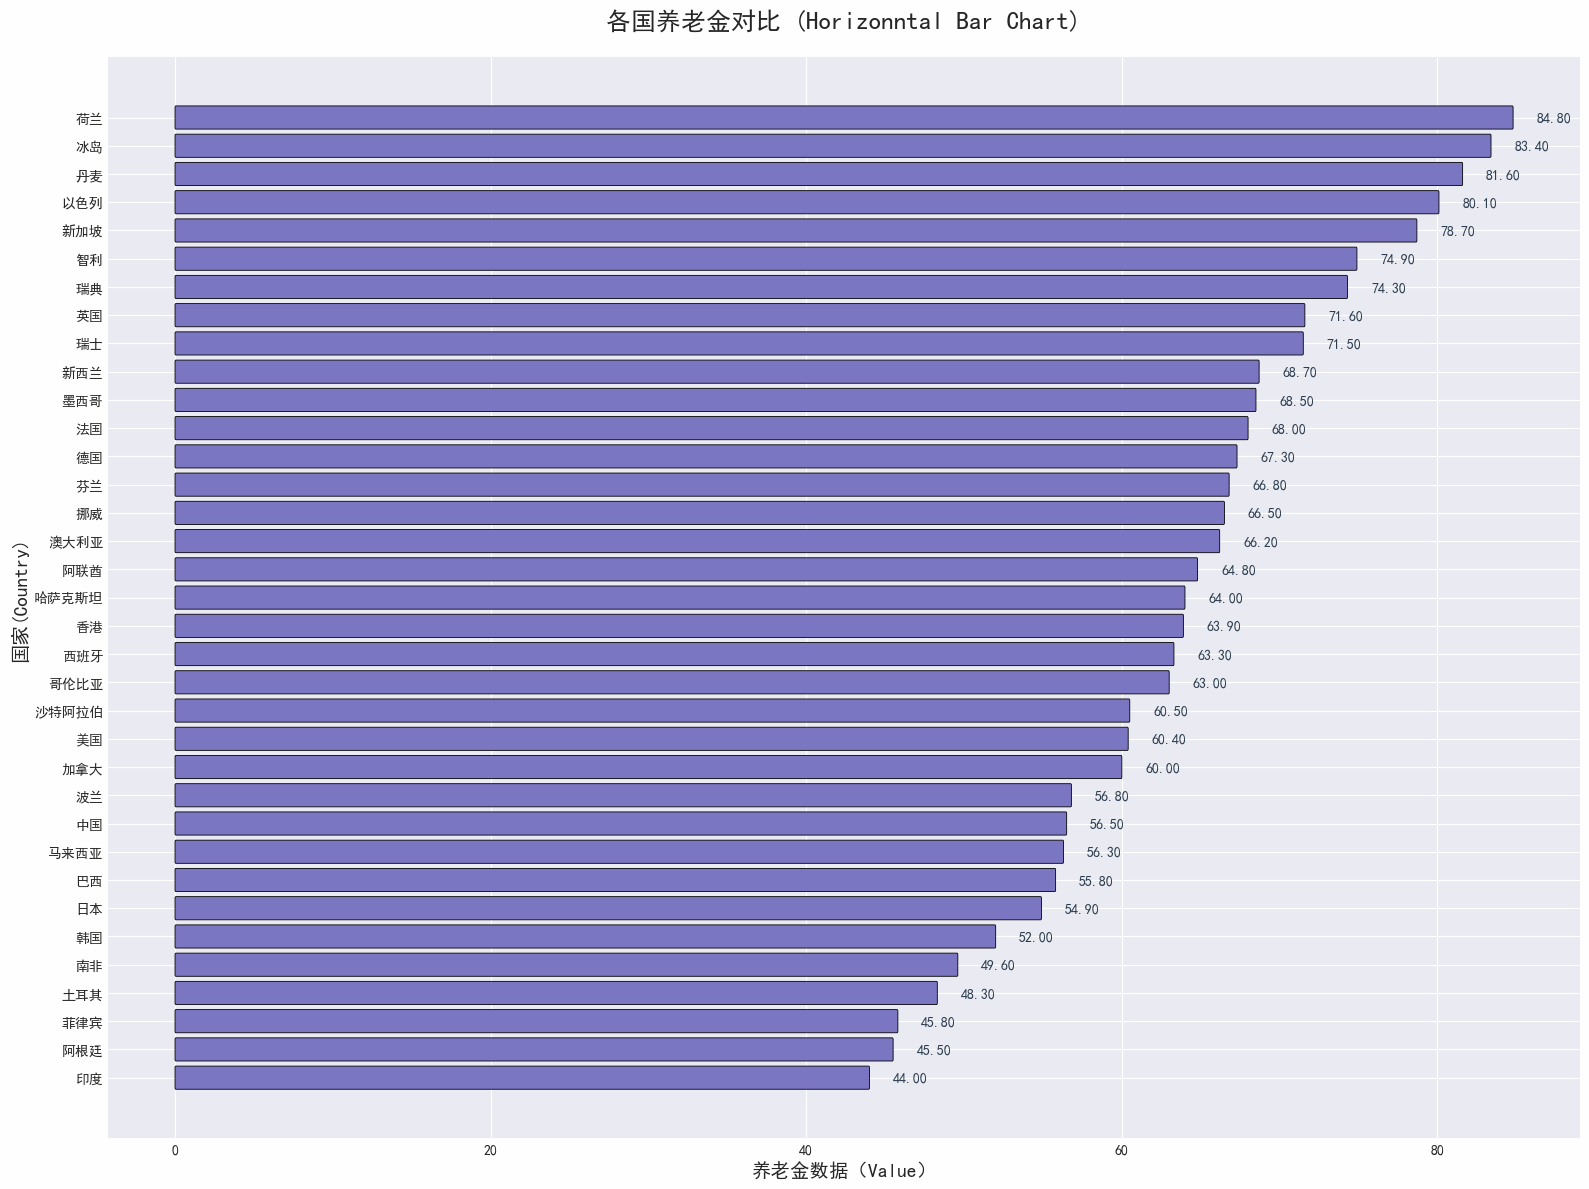

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotx
from IPython.core.pylabtools import figsize
# 从matplotlib的font_manager模块导入FontProperties类，用于自定义字体设置
from matplotlib.font_manager import FontProperties

plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']   # 优先使用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# ======== 数据读取 ========
df = pd.read_excel('./data/pensions_data.xlsx')
# 打印数据前5行
print("数据预览：")
print(df.head())
# 检查DataFrame列中是否包含"Country"(国家)和"Pensions"(养老金)这两列
if 'Country' not in df.columns or 'Pensions' not in df.columns:
    raise ValueError("数据中缺少'Contry'或'Pensions'列，请检查数据文件！")

# 定义一个函数，功能是将直角形状的水平柱子转换为圆角形状的水平柱子
def get_round_rect(rects, ec="black"):
    """将直角水平柱子转换为圆角水平柱子的工具函数"""
    # 调用原始直角柱子对象的get_bbox()方法，获取柱子的边界框信息
    # 边界框包含柱子的左下角坐标（xmin, ymin）、宽度和高度，是创建圆角柱子的基础
    bb = rects.get_bbox()
    # 调用原始柱子的get_facecolor()方法，自动获取柱子的填充颜色
    # 确保生成的圆角柱子与原始直角柱子颜色一致，保持视觉统一
    color = rects.get_facecolor()

    # 使用FancyBboxPatch类创建圆角柱子对象
    # 调用原始柱子对象（FancyBboxPatch），参数设置
    patch = FancyBboxPatch(
        (bb.xmin, bb.ymin),   # 圆角柱子左下角坐标（与原始柱子完全对齐）
        abs(bb.width), abs(bb.height),   # 圆角柱子宽高（与原始柱子一致）
        boxstyle="round,pad=0.01,rounding_size=0.05",  # 设置圆角样式：round表示圆角，pad=0.01是边框 rounding_size=0.05是控制圆角弧度
        ec = ec,  # 柱子边框色：黑色（勾勒轮廓）
        fc = color,  # 柱子填充色：与原始柱子一致
        linewidth=0.6,  # 柱子的宽度，设置为0.6像素
        mutation_aspect=1, # 保持原始柱子的高宽比例，避免圆角柱子变形
        mutation_scale=1, # 控制圆角柱子的整体缩放比例，1表示与原始柱子尺寸会完全一致
    )
    return patch  # 返回创建好的圆角柱子对象

# 使用matplox创建浅灰色主题风格
with plt.style.context(matplotx.styles.pitaya_smoothie['light']):
    # 创建画布对象
    plt.figure(figsize=(16, 12), dpi=100)
    # 绘制直角水平柱状图，使用plt.barh()函数（h表示horizontal，水平方向）
    rects = plt.barh(
        df['Country'],  # y轴数据：使用DataFrame中的"Country"列（国家名称）
        df['Pensions'], # x轴数据：使用DataFrame中的"Pensions"列（养老金）
        color='#7a76c2' # 设置原始直角柱子的填充颜色为蓝紫色（十六进制颜色码）
    )
    # 调用plt.gca()函数，获取当前图表的坐标轴（Axes）对象
    ax = plt.gca()

    # 遍历所有原始的直角柱子，将其批量替换为圆角柱子
    for rect in rects:
        rect.remove()   # 先删除当前的直角柱子，避免重叠
        patch1 = get_round_rect(rect)   # 调用自定义函数，生成对应的圆角柱子
        ax.add_patch(patch1)  # 将生成的圆角柱子添加到坐标轴上，完成直角到圆角的替换

    # 设置水平柱状图的标题
    plt.title('各国养老金对比 (Horizonntal Bar Chart)', fontsize=18, pad=20)
    # 设置y轴（类别轴）标签，说明y轴数据含义，字号为14
    plt.ylabel('国家(Country)', fontsize=14)
    # 设置x轴（数值轴）标签，说明x轴数据含义，字号为14
    plt.xlabel('养老金数据（Value）',fontsize=14)

    # 遍历数据的每一行，为每个水平柱子添加对应的数值标签，让数据更直观
    for i in range(df.shape[0]):  # df.shape[0] 获取数据的行数，i为每个数据行的索引
        # 使用plt.text()函数在柱子上添加文本标签
        plt.text(
            df['Pensions'].iloc[i] + 1.5,  # x坐标，养老金+1.5（向右偏移，避免标签和柱子重叠）
            i,  # y坐标，使用索引i（水平柱状图y轴实际对应数据索引，确保标签与柱子垂直对齐）
            f"{df['Pensions'].iloc[i]:.2f}", # 标签内容：养老金数值，保留2位小数
            fontsize=10,  # 标签文字的字号
            va='center',  # 垂直对齐方式
            ha='left', # 水平对齐方式（left表示左对齐）
            fontweight='bold',  # 字体加粗
            color='#2C3E50'  # 标签文字颜色，深灰蓝色
        )

    # 调用plt.tight_layout()函数，自动调整图表各元素的布局
    plt.tight_layout()

    # ======== 确保输出目录存在 ========
    output_dir = './output/image'
    # 检查该目录是否存在，若不存在则调用os.makedirs()函数创建目录
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 将绘制好的图表保存为PDF格式，PDF矢量图，放大后不失真
    plt.savefig(
        f'{output_dir}/bar_08.png',  # PNG格式
        dpi=300, # 分辨率
        bbox_inches='tight',  # 紧凑布局
        pad_inches=0.2  # 边缘边距
    )
    print(f"\n图表已成功保存到：")
    print(f" -{output_dir}/bar_08.pdf")
    print(f" -{output_dir}/bar_08.png")
    plt.show()

圆角水平条形图生成器 - 优化版
Rounded Horizontal Bar Chart Generator - Optimized

数据摘要 DATA SUMMARY

【养老金支出 (% of GDP)】
  最高: 意大利 (16.2%)
  最低: 中国 (4.5%)
  平均: 9.7%

【平均收入 (k$/year)】
  最高: 美国 ($80k)
  最低: 中国 ($25k)
  平均: $52.5k

数据来源：OECD 2023-2024


使用图例位置: right_upper
正在读取数据...
成功读取 8 条数据

数据预览：
      Country Country_CN  Pensions  Income
United States         美国       7.0      80
        Italy        意大利      16.2      48
       France         法国      13.5      54
      Germany         德国      10.1      58
      Britain         英国       7.7      55
        Spain        西班牙      11.3      44
        China         中国       4.5      25
       Sweden         瑞典       7.4      56

正在生成圆角条形...
图例位置设置为: right_upper
正在添加数值标签...

正在保存图片...
✓ PNG图片已保存: ./output_image\bar_09_right_upper.png
✓ PDF图片已保存: ./output_image\bar_09_right_upper.pdf


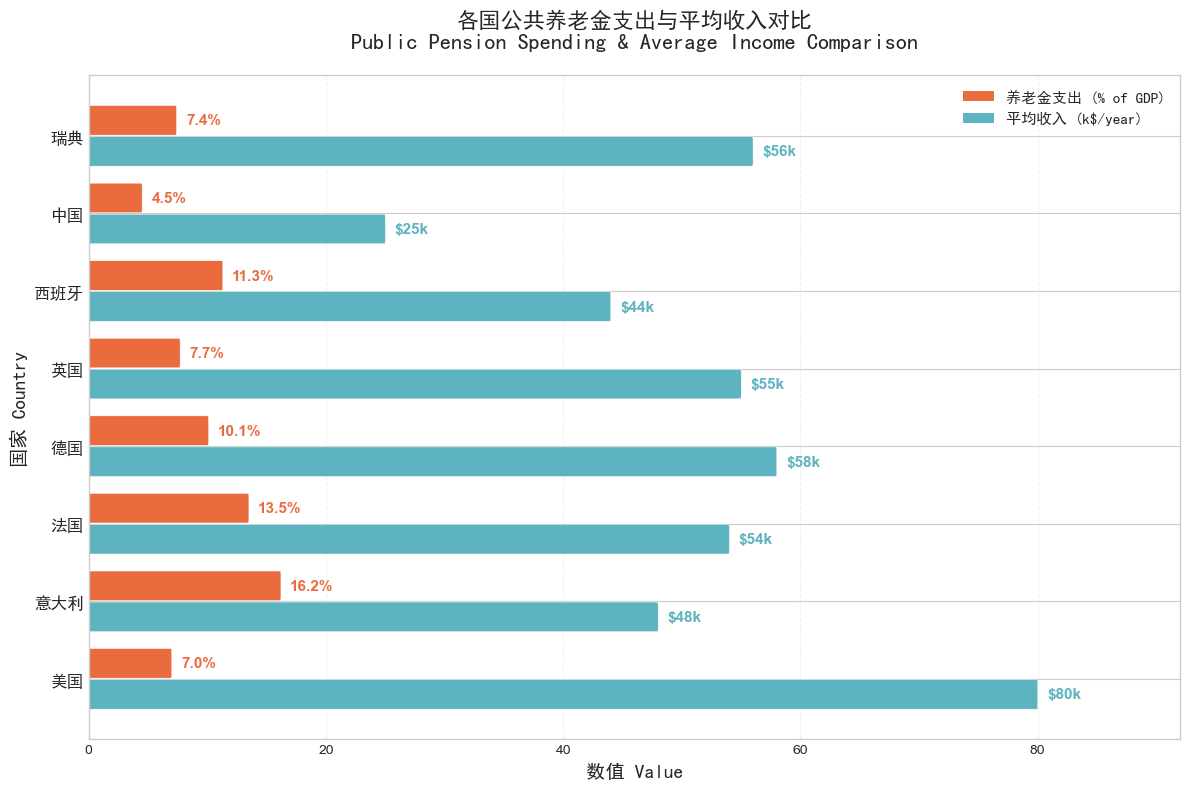


图表生成完成！


In [38]:
"""
圆角水平条形图 - 养老金支出与平均收入对比
数据来源：OECD 2023-2024
图例位置调整，避免与标题遮挡
"""
# 导入matplotlib的pyplot模块，用于创建和设置水平柱状图（核心绘图工具）
import matplotlib.pyplot as plt
# 导入pandas库，用于读取和处理数据（如CSV文件）
import pandas as pd
# 导入numpy库，用于数值计算（如数组操作、数据处理）
import numpy as np
# 从matplotlib的patches模块导入FancyBboxPatch类，用于制作圆角矩形（实现圆角柱子）
from matplotlib.patches import FancyBboxPatch
# 导入matplotlib库（不推荐全导入，此处保留原结构）
import matplotlib
# 导入os库，用于处理文件和目录操作（确保保存图表时路径存在）
import os
# 从matplotlib.font_manager模块导入FontProperties类，用于自定义字体设置
from matplotlib.font_manager import FontProperties

# ==================== 核心优化：中文显示设置（黑体+微软雅黑） ====================
# 设置matplotlib全局字体，优先使用黑体和微软雅黑，确保中文正常显示
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei", "Arial Unicode MS", "Arial"]
# 解决matplotlib中负号显示为方块的异常问题
plt.rcParams['axes.unicode_minus'] = False

# 定义专用字体对象（用于标题和标签，确保一致性）
# 标题字体：黑体/微软雅黑，字号16，加粗
title_font = FontProperties(family=["SimHei", "Microsoft YaHei"], size=16, weight='bold')
# 轴标签字体：黑体/微软雅黑，字号14
label_font = FontProperties(family=["SimHei", "Microsoft YaHei"], size=14)
# 刻度字体：黑体/微软雅黑，字号12
tick_font = FontProperties(family=["SimHei", "Microsoft YaHei"], size=12)
# 图例字体：黑体/微软雅黑，字号11
legend_font = FontProperties(family=["SimHei", "Microsoft YaHei"], size=11)


def get_round_rect(rect, ec="white"):
    """
    创建圆角矩形补丁（用于将直角柱子转换为圆角柱子）
    
    参数:
        rect: matplotlib的矩形对象（由plt.barh生成）
        ec: 边框颜色，默认为白色
    
    返回:
        FancyBboxPatch对象（圆角矩形补丁）
    """
    # 获取原始柱子的边界框信息（包含左下角坐标、宽度、高度）
    bb = rect.get_bbox()
    # 获取原始柱子的填充颜色（确保圆角柱子与原柱子颜色一致）
    color = rect.get_facecolor()
    
    # 创建圆角柱子对象（FancyBboxPatch）
    patch = FancyBboxPatch(
        (bb.xmin, bb.ymin),           # 圆角柱子的左下角坐标，与原始直角柱子对齐
        abs(bb.width),                # 圆角柱子的宽度，与原始柱子一致（取绝对值防负）
        abs(bb.height),               # 圆角柱子的高度，与原始柱子一致（取绝对值防负）
        boxstyle="round,pad=0.01,rounding_size=0.05",  # 圆角样式：边距0.01，圆角弧度0.05
        ec=ec,                        # 柱子边框颜色
        fc=color,                     # 柱子填充颜色（继承原始柱子颜色）
        linewidth=0.3,                # 柱子边框宽度
        mutation_aspect=1,            # 保持原始柱子的高宽比例
        mutation_scale=1              # 保持原始柱子的尺寸比例
    )
    return patch


def create_rounded_bar_chart(csv_file='./data/country_data.csv', output_dir='./output_image', 
                             legend_position='right_upper'):
    """
    创建圆角水平条形图（支持多种图例位置，避免遮挡）
    
    参数:
        csv_file: CSV数据文件路径
        output_dir: 图表输出目录
        legend_position: 图例位置选项
            - 'right_upper': 图表内右上角（推荐）
            - 'upper_right': 图表外右上角
            - 'below_title': 标题下方居中（降低y值）
            - 'lower_right': 图表内右下角
    """
    
    # ==================== 目录结构优化：确保数据目录和输出目录存在 ====================
    # 获取数据文件所在目录路径
    data_dir = os.path.dirname(csv_file)
    # 若数据目录不存在，则创建该目录
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
        print(f"已创建数据目录: {data_dir}")
    
    # 若输出目录不存在，则创建该目录
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"已创建输出目录: {output_dir}")
    
    # 读取CSV数据（指定编码，防止中文乱码）
    print("正在读取数据...")
    try:
        # 尝试使用utf-8编码读取
        df = pd.read_csv(csv_file, encoding='utf-8')
    except UnicodeDecodeError:
        # 若utf-8编码读取失败，尝试使用gbk编码读取（兼容不同编码的CSV文件）
        df = pd.read_csv(csv_file, encoding='gbk')
    
    print(f"成功读取 {len(df)} 条数据")
    print("\n数据预览：")
    # 打印数据的全部内容（无索引），快速预览数据结构
    print(df.to_string(index=False))
    
    # 使用matplotlib的"seaborn-v0_8-whitegrid"样式（优化网格和背景）
    with plt.style.context('seaborn-v0_8-whitegrid'):
        # 创建画布对象：设置画布宽度12英寸、高度8英寸，分辨率100dpi
        fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
        
        # 设置y轴位置（用于双条水平排列，实现养老金和收入条的上下错开）
        x = np.arange(len(df))
        
        # 创建水平条形图 - 养老金支出（上半部分条）
        rects_pensions = ax.barh(
            x + 0.2,                    # y位置：上偏移0.2，与收入条错开
            df['Pensions'],             # 数据：养老金支出（% of GDP）
            height=0.36,                # 条形高度
            label='养老金支出 (% of GDP)', # 图例标签（中文）
            align='center',             # 对齐方式
            color='#ea6b3e',            # 条形颜色：橙红色
            zorder=2                    # 绘制层级（在网格之上）
        )
        
        # 创建水平条形图 - 平均收入（下半部分条）
        rects_income = ax.barh(
            x - 0.2,                    # y位置：下偏移0.2，与养老金条错开
            df['Income'],               # 数据：平均收入（k$/year）
            height=0.36,                # 条形高度
            label='平均收入 (k$/year)',   # 图例标签（中文）
            align='center',             # 对齐方式
            color='#5db3bf',            # 条形颜色：青绿色
            zorder=2                    # 绘制层级（在网格之上）
        )
        
        # 替换为圆角矩形（批量将直角柱子转换为圆角柱子）
        print("\n正在生成圆角条形...")
        # 遍历养老金和收入的条形组
        for rect_group in [rects_pensions, rects_income]:
            # 遍历组内的每个条形
            for rect in rect_group:
                patch = get_round_rect(rect)  # 生成圆角补丁
                rect.remove()  # 移除原始直角条形
                ax.add_patch(patch)  # 添加圆角条形到坐标轴
        
        # 设置y轴刻度和标签（使用中文国家名称）
        ax.set_yticks(x)
        # 应用中文刻度字体，确保国家名称正常显示
        ax.set_yticklabels(df['Country_CN'], fontproperties=tick_font)
        
        # ==================== 根据图例位置调整标题pad值 ====================
        if legend_position == 'below_title':
            title_pad = 55  # 图例在标题下方时，增大标题与图表的间距
        elif legend_position in ['right_upper', 'upper_right', 'lower_right']:
            title_pad = 20  # 图例在侧边或图表内时，标题间距保持默认
        else:
            title_pad = 20
        
        # 设置标题和轴标签（使用自定义中文字体）
        ax.set_title(
            '各国公共养老金支出与平均收入对比\nPublic Pension Spending & Average Income Comparison',
            fontproperties=title_font,  # 应用标题字体（黑体/微软雅黑）
            pad=title_pad  # 动态调整标题与图表的间距
        )
        # 设置x轴标签，应用轴标签字体
        ax.set_xlabel('数值 Value', fontproperties=label_font)
        # 设置y轴标签，应用轴标签字体
        ax.set_ylabel('国家 Country', fontproperties=label_font)
        
        # 设置x轴范围（留15%余量，避免数值标签超出画布）
        max_value = max(df['Income'].max(), df['Pensions'].max())
        ax.set_xlim(0, max_value * 1.15)
        
        # 添加网格线（浅色虚线，位于条形下方，不遮挡数据）
        ax.grid(True, axis='x', alpha=0.3, linestyle='--', zorder=0)
        ax.set_axisbelow(True)  # 确保网格线显示在条形下方
        
        # ==================== 核心优化：根据参数设置图例位置 ====================
        print(f"图例位置设置为: {legend_position}")
        
        if legend_position == 'right_upper':
            # 方案1：图表内右上角（推荐，不遮挡标题和条形）
            ax.legend(
                loc='upper right',     # 图例基准位置：右上角
                prop=legend_font,      # 应用图例字体
                framealpha=0.95,       # 图例背景半透明度
                edgecolor='gray',      # 图例边框颜色
                fancybox=True,         # 图例边框为圆角
                shadow=True            # 图例添加阴影效果
            )
            
        elif legend_position == 'upper_right':
            # 方案2：图表外右上角（完全不遮挡图表内容）
            ax.legend(
                loc='upper left',      # 图例基准位置：左上角
                bbox_to_anchor=(1.02, 1),  # 图例偏移：图表外右侧
                prop=legend_font,
                framealpha=0.95,
                edgecolor='gray',
                fancybox=True,
                shadow=True
            )
            
        elif legend_position == 'below_title':
            # 方案3：标题下方居中（降低y值，避免与标题冲突）
            ax.legend(
                loc='upper center',    # 图例基准位置：上中部
                bbox_to_anchor=(0.5, 1.05),  # 图例偏移：标题下方
                ncol=2,                # 图例列数：2列（横向排列）
                prop=legend_font,
                framealpha=0.95,
                edgecolor='gray',
                fancybox=True,
                shadow=True
            )
            
        elif legend_position == 'lower_right':
            # 方案4：图表内右下角（不遮挡主要条形区域）
            ax.legend(
                loc='lower right',     # 图例基准位置：右下角
                prop=legend_font,
                framealpha=0.95,
                edgecolor='gray',
                fancybox=True,
                shadow=True
            )
        
        # 在条形上添加数值标签（保持颜色与条形一致，增强数据可读性）
        print("正在添加数值标签...")
        # 遍历每一行数据，为养老金和收入条分别添加标签
        for idx, (pension, income) in enumerate(zip(df['Pensions'], df['Income'])):
            # 养老金标签（橙红色，与条形同色）
            ax.text(
                pension + 0.8,          # x位置：条形右侧偏移0.8，避免重叠
                idx + 0.2,              # y位置：与养老金条垂直对齐
                f'{pension:.1f}%',      # 标签内容：养老金数值，保留1位小数
                fontsize=11,
                va='center',            # 垂直对齐方式：居中
                ha='left',              # 水平对齐方式：左对齐
                color='#ea6b3e',        # 标签颜色：与养老金条形同色
                fontweight='bold'       # 字体加粗，增强醒目度
            )
            
            # 收入标签（青绿色，与条形同色）
            ax.text(
                income + 0.8,           # x位置：条形右侧偏移0.8，避免重叠
                idx - 0.2,              # y位置：与收入条垂直对齐
                f'${income}k',          # 标签内容：收入数值，带$和k单位
                fontsize=11,
                va='center',            # 垂直对齐方式：居中
                ha='left',              # 水平对齐方式：左对齐
                color='#5db3bf',        # 标签颜色：与收入条形同色
                fontweight='bold'       # 字体加粗，增强醒目度
            )
        
        # 调整布局（自动优化图表元素间距，避免标签被截断）
        plt.tight_layout()
        
        # 保存图片（支持PNG和PDF格式，高清分辨率）
        # 生成带图例位置标识的文件名，便于区分不同布局的图表
        output_png = os.path.join(output_dir, f'bar_09_{legend_position}.png')
        output_pdf = os.path.join(output_dir, f'bar_09_{legend_position}.pdf')
        
        print(f"\n正在保存图片...")
        # 保存为PNG格式（位图，适合快速预览）
        plt.savefig(output_png, dpi=300, bbox_inches='tight', pad_inches=0.1)
        # 保存为PDF格式（矢量图，适合印刷和放大）
        plt.savefig(output_pdf, dpi=300, bbox_inches='tight', pad_inches=0.0)
        
        print(f"✓ PNG图片已保存: {output_png}")
        print(f"✓ PDF图片已保存: {output_pdf}")
        
        # 弹出窗口显示绘制完成的图表，便于实时查看效果
        plt.show()
        
        print("\n图表生成完成！")
        # 返回画布和坐标轴对象（便于后续进一步操作，可选）
        return fig, ax


def print_data_summary(csv_file='./data/country_data.csv'):
    """
    打印数据摘要信息（使用中文描述，增强可读性）
    
    参数:
        csv_file: CSV数据文件路径
    """
    # 读取数据（兼容不同编码）
    try:
        df = pd.read_csv(csv_file, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(csv_file, encoding='gbk')
    
    print("\n" + "="*60)
    print("数据摘要 DATA SUMMARY")
    print("="*60)
    
    # 养老金支出统计（中文描述）
    print("\n【养老金支出 (% of GDP)】")
    # 获取养老金支出最大值的索引
    max_pension_idx = df['Pensions'].idxmax()
    # 获取养老金支出最小值的索引
    min_pension_idx = df['Pensions'].idxmin()
    print(f"  最高: {df['Country_CN'].iloc[max_pension_idx]} ({df['Pensions'].max():.1f}%)")
    print(f"  最低: {df['Country_CN'].iloc[min_pension_idx]} ({df['Pensions'].min():.1f}%)")
    print(f"  平均: {df['Pensions'].mean():.1f}%")
    
    # 平均收入统计（中文描述）
    print("\n【平均收入 (k$/year)】")
    # 获取平均收入最大值的索引
    max_income_idx = df['Income'].idxmax()
    # 获取平均收入最小值的索引
    min_income_idx = df['Income'].idxmin()
    print(f"  最高: {df['Country_CN'].iloc[max_income_idx]} (${df['Income'].max()}k)")
    print(f"  最低: {df['Country_CN'].iloc[min_income_idx]} (${df['Income'].min()}k)")
    print(f"  平均: ${df['Income'].mean():.1f}k")
    
    print("\n" + "="*60)
    print("数据来源：OECD 2023-2024")
    print("="*60 + "\n")


# 主程序入口
if __name__ == "__main__":
    print("="*60)
    print("圆角水平条形图生成器 - 优化版")
    print("Rounded Horizontal Bar Chart Generator - Optimized")
    print("="*60)
    
    # 数据文件路径
    csv_file = './data/country_data.csv'
    
    # 检查CSV文件是否存在
    if not os.path.exists(csv_file):
        print(f"\n错误：找不到数据文件 '{csv_file}'")
        print("请确保CSV文件路径正确。")
    else:
        # 打印数据摘要
        print_data_summary(csv_file)
        # 设置图例位置为图表内右上角（推荐方案）
        legend_position = 'right_upper'   
        print(f"\n使用图例位置: {legend_position}") 
        # 生成图表
        create_rounded_bar_chart(csv_file, output_dir='./output_image', 
                                legend_position=legend_position)  
# 显示图表（确保所有绘图操作完成后显示，此处为冗余保险操作）
plt.show()